# Proyecto Final - Diagnóstico de Diabetes

### 1. Introducción

###### La enfermedad de Diabetes es de las más comunes dentro de las enfermedades crónicas, afectando a casi el 13% de la población mundial y generando miles de muertes todos los años, en los casos más extremos. La gran mayoría de alimentos que consumimos tiene glucosa (azúcar) y el cuerpo la transforma en energía procesándola a través de la insulina (hormona generada por el páncreas). Es aquí donde la Diabetes entra en juego ya que las personas que sufren de esta enfermedad no producen dicha hormona o sí lo hacen pero su cuerpo no la utiliza adecuadamente y esto genera un aumento en los niveles de azúcar en sangre, lo que con el tiempo puede generar problemas graves de salud como enfermedades del corazón, pérdida de la visión e incluso de extremidades y afectar gravemente los riñones. Si bien no existe una cura para la Diabetes, en muchos casos la misma puede ser reversible de forma natural con pérdida de peso y una dieta sana y, en casos más serios, ser manejada con medicamentos.

###### El Dataset bajo análisis posee información recopilada por el Sistema de Vigilancia de Factores de Riesgo del Comportamiento (SVFRC), el cual realiza encuestas telefónicas relacionadas con la salud para que luego la Centro de Control y Prevención de Enfermedades (CDC) tenga un vistazo general de la situación de salud nacional de Estados Unidos. El objetivo del presente trabajo será utilizar dichos datos para crear un modelo que, basado en las distintas variables relacionadas con esta enfermedad, pueda predecir y/o detectar rápidamente la misma para evitar que esta llegue a sus peores consecuencias en las personas. Por otra parte, la hipótesis que se plantea es la siguiente: 

 ###### *La dieta, el estilo de vida, la falta de ejercicio y el peso corporal son los principales causantes de la diabetes (en casos no hereditarios), siendo esta una de las consecuencias más severas del sobrepeso que aparece en las personas que, en su mayoría, también poseen presión arterial alta , colesterol alto, una salud física y mental mala, y un mayor riesgo de padecer problemas cardíacos y/o de ACV.*


#### 1.1 Contexto de Investigación
###### Como se ha mencionado anteriormente, la Diabetes es una de las enfermedades crónicas más comunes a nivel global, especialmente la Diabetes tipo 2 que se desarrolla en adultos. Es muy llamativo el aumento de casos en los últimos años, el cual se da en países de distintos niveles de desarrollo/ingresos, y es por eso que las organizaciones internacionales de salud han hecho grán énfasis en buscar mejores tratamientos y métodos preventidos para las personas que sufren o tienen riesgo de sufrir esta enfermedad.
* ###### Aproximadamente, 62 millones de personas SOLO EN AMÉRICA tiene Diabetes tipo 2.
* ###### El aumento de casos es mayor en países de ingresos bajos y medios.
* ###### La Diabetes es de las principales causantes de problemas renales, ataques cardíacos, ceguera, derrames cerebrales y amputaciones de miembros inferiores.
* ###### Desde el 2000 hubo un aumento del 6% en la mortalidad causada por esta enfermedad. Solo en Ámerica, representa la sexta causa de muertes.
* ###### Si bien se sabe que el peso y la actividad física son variables con relación directa con esta enfermedad, aún se están investigando otras causas como el ser una enfermedad hereditaria y otras variables como los distintos tipos de alimentos.
* ###### En algunos casos, la enfermedad puede ser reversible.

#### 1.2 Problema de Investigación
###### En línea con el punto anterior, la principal pregunta que se plantea en este trabajo es: ¿es posible predecir o conocer la probabilidad de que un individuo tenga o pueda tener Diabetes en base a las variables: ejercició físico, peso corporal, presión arterial, colesterol, salud física y mental y riesgo/historial de ACVs?

### 2. Preparación del Dataset

###### Antes de comenzar con el anáisis y el armado del modelo es impresindible contar con las herramientas que vamos a necesitar para el mismo. En primer lugar, se importarán las librerías Pandas y Numpy:

In [1]:
import pandas as pd

In [2]:
import numpy as np

###### En segundo lugar, se importará el archivo CSV utilizando la librería Pandas y se mostrarán 5 registros para verificar cómo se visualiza el archivo:

In [3]:
Diabetes = pd.read_csv("https://raw.githubusercontent.com/Sofita315/Proyecto-Final/Proyecto-final/Proy/Diabetes%20parameters.csv",delimiter=";")
Diabetes.tail(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
287253,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
287254,0.0,1.0,0.0,1.0,39.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,4.0
287255,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,20.0,0.0,0.0,1.0,1.0,6.0,5.0
287256,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,6.0
287257,0.0,0.0,1.0,0.0,19.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,1.0,0.0,10.0,3.0,2.0


###### Una vez que se verifica que se ha importado el archivo correctamente, es de suma importancia conocer las proporciones del mismo, esto es, la forma, el nombre y tipo de dato de las columnas, si existen datos nulos, el tipo de dato de cada columna, las medidas básicas (media, desvío, conteo, mínimo, cuartiles y máximo):

In [4]:
Diabetes.shape

(287258, 22)

In [5]:
Diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
Diabetes.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [7]:
Diabetes.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
Diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,...,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.000000,287258.00000,287258.000000,287258.000000
mean,0.262214,0.422742,0.419142,0.962055,28.311963,0.442000,0.039567,0.091698,0.758840,0.634757,...,0.950995,0.083897,2.496508,3.168730,4.174926,0.164316,0.439695,8.00417,5.055884,6.069126
std,0.662987,0.493996,0.493420,0.191064,6.566517,0.496625,0.194940,0.288600,0.427788,0.481499,...,0.215878,0.277233,1.064207,7.389841,8.650077,0.370562,0.496351,3.05978,0.983465,2.065656
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.00000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.00000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.00000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.00000,6.000000,8.000000


###### En base a lo ejecutado hasta ahora, se puede ver que el dataset consta de:
* ######    22 columnas.
* ######    287258 filas.
* ######    Datos numéricos.
* ######    No hay datos nulos.

###### Por otro lado, las variables bajo análisis son las siguientes:
* ###### **Diabetes_012:** Si la persona tiene o no diabetes. 0 = no tiene diabetes, 1 = prediebetes y 2 = diabetes. Se considera que la persona tiene "prediabetes" cuando tienen cierta dificultad con el manejo de la insulina y poseen un nivel de entre 100 y 125 mg/dl de glucosa en sangre estando en ayunas.
* ###### **HighBP:** Presión. 0 = presión normal/baja y 1 = presión alta. Se considera presión alta cuando supera los 140/90.
* ###### **HighChol:** Colesterol. 0 = colesterol normal/bajo y 1 = colesterol alto. Se considera colesterol bueno alto cuando es mayor a 35 mg/dl en el hombre y a 40 mg/dl en la mujer. Se considera colesterol malo alto cuando es mayor de 160 mg/dl.
* ###### **CholCheck:** Si la persona se ha chequeado el colesterol en los últimos años. 0 = no chequeado en 5 años y 1 = chequeado en 5 años.
* ###### **BMI:** Indice de Masa Corporal. <18,5 = muy delgado, <24,5 normal, <29,9 algo de sobrepeso, <34,9 obeso y >40 obesidad extrema.
* ###### **Smoker:** Si la persona fuma. 0 = no fuma y 1 = fuma.
* ###### **Stroke:** Si la persona tuvo algún ACV. 0 = no y 1 = sí.
* ###### **HeartDiseaseorAttack:** Si la persona tiene o tuvo algún problema de corazón o paro cardíaco. 0 = no y 1 = sí.
* ###### **PhysActivity:** Si la persona ha realizado actividad física en los últimos 30 días. 0 = no y 1 = sí.
* ###### **Fruits y Veggies:** Si la persona consume fruta diariamente. 0 = no y 1 = sí.
* ###### **HvyAlcoholConsump:** Si la persona toma más de 14 veces por semana. O = no y 1 = sí.
* ###### **AnyHealthCare:** Si la persona tiene o no cobertura médica. 0 = no y 1 = sí.
* ###### **NoDocbcCost:** Si la persona quizo ver a un médico en los últimos 12 meses y no pudo por su costo. 0 = no y 1 = sí.
* ###### **GenHealth:** Si la persona tiene alguna condición de salud. Escala de 0 a 5 donde 5 es muy bien de salud y 0 mal de salud.
* ###### **MentHlth:** Durante cuántos días, en los últimos 30 días, se sintió mal mentalmente la persona. Escala de 0 a 30.
* ###### **PhysHlth:** Durante cuántos días, en los últimos 30 días, se sintió mal físicamente la persona. Escala de 0 a 30.
* ###### **DiffWalk:** Si la persona tiene dificultades serias para caminar o trepar. 0 = no y 1 = sí.
* ###### **Sex:** Sexo. 0 = mujer y 1 = hombre.
* ###### **Education:** Último grado aprobado del colegio primario. Escala de 1 a 6.
* ###### **Age e Income:** Para la edad se utiliza un índice de 14 rangos de edad. Para los ingresos se utiliza un índice de 8 rangos de ingresos anuales. Se muestram dichos rangos en las tablas debajo:

In [9]:
Rango_edad = pd.DataFrame()


Rango_edad["Valor"] = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Rango_edad["Edad"] = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79",">80"]


print(Rango_edad)

    Valor   Edad
0       1  18-24
1       2  25-29
2       3  30-34
3       4  35-39
4       5  40-44
5       6  45-49
6       7  50-54
7       8  55-59
8       9  60-64
9      10  65-69
10     11  70-74
11     12  75-79
12     13    >80


In [10]:
Rango_ingresos = pd.DataFrame()


Rango_ingresos["Valor"] = [1,2,3,4,5,6,7,8]
Rango_ingresos["Edad"] = [10000,18125,26250,34375,42500,50625,58750,75000]


print(Rango_ingresos)

   Valor   Edad
0      1  10000
1      2  18125
2      3  26250
3      4  34375
4      5  42500
5      6  50625
6      7  58750
7      8  75000


###### Finalmente, y a fin de emprolijar un poco la información, se reducirán los ecimales del dataset principal:

In [11]:
Diabetes1 = Diabetes.astype(int)
Diabetes1


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287253,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,1,4,6,8
287254,0,1,0,1,39,1,0,0,1,0,...,1,0,3,0,0,0,0,11,4,4
287255,0,0,0,1,35,0,0,0,1,0,...,1,0,2,20,0,0,1,1,6,5
287256,0,1,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,1,12,6,6


### 3. Desarrollo

###### En esa sección se comenzarán a analizar los datos que aporta el Dataset para obtener un vistazo gneral de la situación. Para ello, es imprescindible contar con las herramientas visuales correctas por lo que se importarán las librerías: MatplotLib y Seaborn (se utilizará el estilo Notebook). Para la misma, se utilizarán tres gráficas de cada librería, comenzando por un gráfico de torta de la librería Matplotlib, que busca establecer la distribución de cada condicion en el total de la muestra.

###### Antes que nada, se importan las librerías:

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
mpl.style.use("seaborn-notebook")

<ipython-input-13-755b9a9026a0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-notebook")


##### **Gráfico #1:** Gráfico de Torta.

###### El principal objetivo de esta visualización es ver la cantidad de casos sin diabetes, con prediabetes y con diabetes dentro de la muestra. Para ello, se agruparon y contaron los casos dentro de las tres condiciones (sin diabetes, con prediabetes y con diabetes) con el objetivo de saber cuántos casos hay de cada uno.

In [14]:
Diabetes_conteo = Diabetes1.groupby(by="Diabetes_012").count()
Diabetes_conteo

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,247281,247281,247281,247281,247281,247281,247281,247281,247281,247281,...,247281,247281,247281,247281,247281,247281,247281,247281,247281,247281
1,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,...,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631
2,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,...,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


###### Luego se crearon dos listas: Grupos_final que muestra el porcentaje que representa cada condición dentro del total de la muestra, y Condiciones que servirá para establecer las etiquetas del gráfico.

In [15]:
Grupos = [247281/287258, 4631/287258, 35346/287258]
Grupos_porcentaje = np.multiply(Grupos,100)
Grupos_final = list(np.around(np.array(Grupos_porcentaje),2))

Condiciones = ["No diabetes","Prediabetes","Sí diabetes"]


###### Finalmente se creó el gráfico de torta:

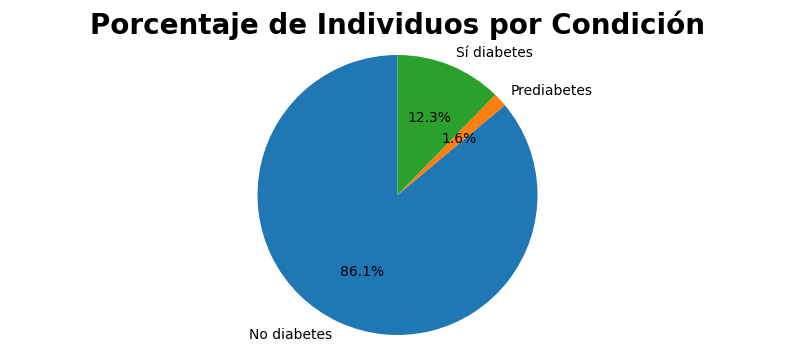

In [16]:
formato_titulo = {"family":"sans-serif","color":"black","weight":"bold","size":20}
formato_xy = {"family":"sans-serif","color":"black","weight":"bold","size":15}

fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,4)
ax1.pie(Grupos_final, labels=Condiciones, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Porcentaje de Individuos por Condición",formato_titulo)

plt.show()


###### A partir del mismo podemos ver que prevalecen ampliamente los casos SIN diabetes dentro de la muestra con un 86,1%, seguido por los casos con diabetes siendo 12,3% y finalmente los casos de prediabetes que únicamente representan el 1,6% de la muestra. Como se puede ver, la información de la muestra va en línea perfectamente con lo expresado al comienzo de este trabajo, esto es, que aproximadamente el 13% de la población sufre de esta condición.

##### **Gráfico #2:** Gráfico de Barras Adyacentes.

###### El principal objetivo de esta visualización es comparar la cantidad de personas que cumplen con las distintas variables, en cada uno de los tres posibles casos de la enfermedad (no tener diabetes, tener prediabetes y tener diabetes) para poder detectar rápidamente cuáles de dichas variables predominan en cada caso.

###### En primer lugar, se agrupará en base a las tres condiciones de la columna Diabetes_012 que especifican si la persona tiene diabetes (valor = 2), si tiene prediabetes (valor = 1) y si no tiene diabetes (valor = 0):

In [17]:
Diabetes_categorias = Diabetes1.groupby(by="Diabetes_012").sum()
Diabetes_categorias

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,91919,93841,236684,6861460,106369,7833,17799,192554,158857,203114,...,234880,19759,587039,731558,888723,32795,107344,1925685,1262451,1534468
1,2913,2875,4569,142285,2282,265,664,3142,2789,3561,...,4377,599,13780,20978,29399,1285,2027,42065,22157,24781
2,26604,23686,35105,1129093,18317,3268,7878,22287,20693,26736,...,33924,3742,116323,157707,281159,13121,16935,331512,167735,184156


###### A continuación, y con el fin de luego graficar los datos, se transformarán las tres filas resultantes de la tabla anterior en listas:

In [18]:
Listas_diabetes = Diabetes_categorias.to_numpy().tolist()
No_diabetes = Listas_diabetes[0]
Prediabetes =Listas_diabetes[1]
Si_diabetes = Listas_diabetes[2]

print( No_diabetes, Prediabetes, Si_diabetes)

[91919, 93841, 236684, 6861460, 106369, 7833, 17799, 192554, 158857, 203114, 15290, 234880, 19759, 587039, 731558, 888723, 32795, 107344, 1925685, 1262451, 1534468] [2913, 2875, 4569, 142285, 2282, 265, 664, 3142, 2789, 3561, 208, 4377, 599, 13780, 20978, 29399, 1285, 2027, 42065, 22157, 24781] [26604, 23686, 35105, 1129093, 18317, 3268, 7878, 22287, 20693, 26736, 832, 33924, 3742, 116323, 157707, 281159, 13121, 16935, 331512, 167735, 184156]


###### Ahora bien, para realizar este primer gráfico se quitaron los elementos de las variables que no tienen valores binarios de las tres listas creadas anteriormente, y además se creo una cuarta lista con los encabezados de columna que servirá como eje X.

In [19]:
No_diabetes_cortado =[91919, 93841, 236684, 106369, 7833, 17799, 192554, 158857, 203114, 15290, 234880, 19759, 32795]
Prediabetes_cortado = [2913,2875,4569,2282,265,664,3142,2789,3561,208,4377,599,1285]
Si_diabetes_cortado = [26604,23686,35105,18317,3268,7878,22287,20693,26736,832,33924,3742,13121]
columnas = ('HighBP', 'HighChol', 'CholCheck', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk')


In [20]:
No_diabetes_division = list(map(lambda x: x / 247281, No_diabetes_cortado)) 
No_diabetes_porcentaje = np.multiply(No_diabetes_division,100)


Prediabetes_division = list(map(lambda x: x / 4631, Prediabetes_cortado)) 
Prediabetes_porcentaje = np.multiply(Prediabetes_division,100)

Si_diabetes_division = list(map(lambda x: x / 35346, Si_diabetes_cortado)) 
Si_diabetes_porcentaje = np.multiply(Si_diabetes_division,100)

No_diabetes_final=No_diabetes_porcentaje.astype(int)
Prediabetes_final = Prediabetes_porcentaje.astype(int)
Si_diabetes_final = Si_diabetes_porcentaje.astype(int)



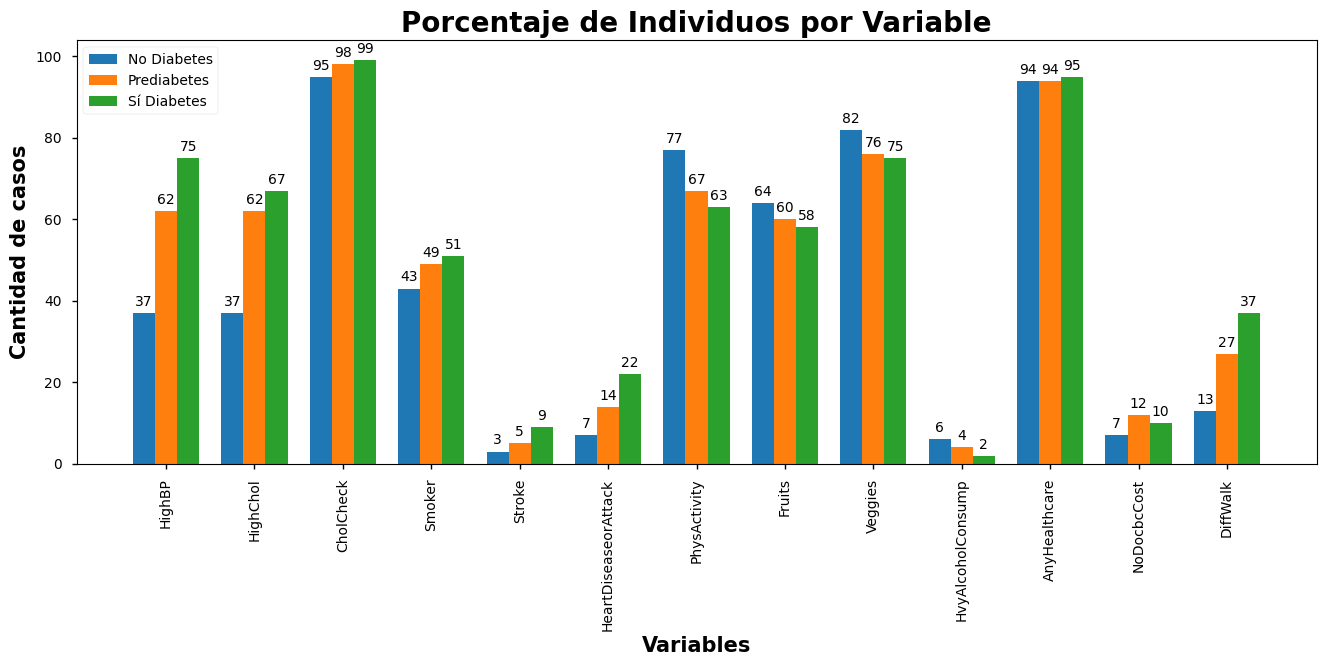

In [21]:
x = np.arange(len(columnas))
width = 0.25
plt.figure(figsize=(16,5.5))

pps = plt.bar(x - width, No_diabetes_final, width, label='No Diabetes')
for p in pps:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha="center", va="bottom")

pps = plt.bar(x, Prediabetes_final, width, label='Prediabetes')
for p in pps:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3),
      textcoords="offset points",
      ha="center", va="bottom")

pps = plt.bar(x + width, Si_diabetes_final, width, label ="Sí Diabetes")
for p in pps:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3),
      textcoords="offset points",
      ha="center", va="bottom")

plt.title("Porcentaje de Individuos por Variable",fontdict=formato_titulo)  
plt.xlabel("Variables",fontdict=formato_xy) 
plt.ylabel("Cantidad de casos",fontdict=formato_xy)

plt.legend(loc="upper left") 

plt.xticks(x, columnas)
plt.xticks(rotation=90)
plt.show()

###### A partir de la gráfica se pueden apreciar los siguientes puntos:
* ###### **Personas sin diabetes:** Dentro de este grupo se puede ver que son en especial minoría las personas con presión y colesterol alto, y fumadoras. Por otro lado, tienen el mayor porcentaje de personas que hacen ejercicio, y comen frutas y verduras.
* ###### **Personas con diabetes:** Dentro de este grupo se puede ver que se destacan mayorías en presión y colesterol alto, personas fumadoras y tener dificultad para caminar. Por otro lado, si bien la mayoría de los individuos cumple con la variable, se expresan los menores valores en cuanto a la cantidad de personas que hacen ejercicio, y comen frutas y verduras.
* ###### **General:** Para todas las condiciones se ven tendencias similares en las variables: periodicidad del chequeo del colesterol, haber tenido un ACV (aunque hay una relación creciente entre las personas sin diabetes y las personas con), consumir mucho alcohol, tener una cobertura médica y acceso a los médicos que requieren.

##### **Gráfico #3:** Gráfico tipo "Tornado".

###### En línea con el punto anterior, es importante conocer si existe una tendencia a tener, o no, diabetes relacionada con el sexo. Para ello, se utilizará un gráfico de barras tipo tornado, con el objetivo de comparar la cantidad de casos de cada condición en ambos sexos. En primer lugar se agrupará el dataset en base a los sexos y su condición de la enfermedad:

In [22]:
Sexos = Diabetes1.groupby(["Sex","Diabetes_012"]).count()
Sexos

HighBP  HighChol  CholCheck     BMI  Smoker  Stroke  \
Sex Diabetes_012                                                        
0   0             139937    139937     139937  139937  139937  139937   
    1               2604      2604       2604    2604    2604    2604   
    2              18411     18411      18411   18411   18411   18411   
1   0             107344    107344     107344  107344  107344  107344   
    1               2027      2027       2027    2027    2027    2027   
    2              16935     16935      16935   16935   16935   16935   

                  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
Sex Diabetes_012                                                        
0   0                           139937        139937  139937   139937   
    1                             2604          2604    2604     2604   
    2                            18411         18411   18411    18411   
1   0                           107344        107344  107344   107344   
    1                             2027          2027    2027     2027   
    2                            16935         16935   16935    16935   

                  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  \
Sex Diabetes_012                                                           
0   0                        139937         139937       139937   139937   
    1                          2604           2604         2604     2604   
    2                         18411          18411        18411    18411   
1   0                        107344         107344       107344   107344   
    1                          2027           2027         2027     2027   
    2                         16935          16935        16935    16935   

                  MentHlth  PhysHlth  DiffWalk     Age  Education  Income  
Sex Diabetes_012                                                           
0   0               139937    139937    139937  139937     139937  139937  
    1                 2604      2604      2604    2604       2604    2604  
    2                18411     18411     18411   18411      18411   18411  
1   0               107344    107344    107344  107344     107344  107344  
    1                 2027      2027      2027    2027       2027    2027  
    2                16935     16935     16935   16935      16935   16935

###### Luego, al igual que se hizo anteriormente, se cortará la tabla dejando únicamente los dos índices y la columna de HighBP (como puede verse, todas las filas tienen un mismo valor ya que se está contando y no sumando, por lo que cualquiera sirve de referencia) y a partir de allí se crearán las listas necesarias para generar el gráfico:

In [23]:
Casos_sexos = Sexos.iloc[:6, 0:1]
Casos_sexos

HighBP
Sex Diabetes_012        
0   0             139937
    1               2604
    2              18411
1   0             107344
    1               2027
    2              16935

In [24]:
Lista_sexos = list(Casos_sexos["HighBP"])
Femenino = Lista_sexos [0:3]
Masculino = Lista_sexos [3:7]

print(Femenino, Masculino, Condiciones)

[139937, 2604, 18411] [107344, 2027, 16935] ['No diabetes', 'Prediabetes', 'Sí diabetes']


In [25]:
Femenino_division = list(map(lambda x: x / 160952, Femenino)) 
Femenino_porcentaje = np.multiply(Femenino_division,100)

Masculino_division = list(map(lambda x: x / 126306, Masculino)) 
Masculino_porcentaje = np.multiply(Masculino_division,100)

Femenino_final=Femenino_porcentaje.astype(int)
Masculino_final = Masculino_porcentaje.astype(int)

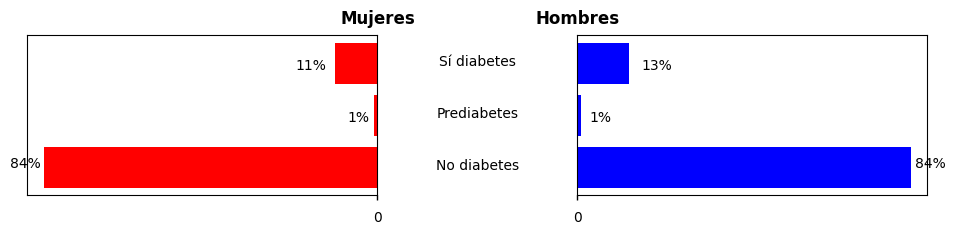

[86  1 11] [84  1 13]


In [26]:
Cant_condiciones = len(Condiciones)
Hombres = np.random.uniform(low=20, high=300, size=Cant_condiciones)
Mujeres = np.random.uniform(low=20, high=300, size=Cant_condiciones)

x = np.arange(Cant_condiciones)

fig = plt.figure(figsize=(10,2),facecolor="white", edgecolor="none")

ax_mujeres = fig.add_axes([0.05, 0.1, 0.35, 0.8])
ax_hombres = fig.add_axes([0.6, 0.1, 0.35, 0.8])

ax_hombres.set_xticks(np.arange(0,0.5,1))
ax_mujeres.set_xticks(np.arange(0,0.5,1))

ax_mujeres.xaxis.set_ticks_position("bottom")
ax_hombres.xaxis.set_ticks_position("bottom")

ax_mujeres.barh(x, Femenino_final, align="center",facecolor="red", edgecolor="None")
ax_mujeres.set_yticks([])
ax_mujeres.invert_xaxis()

ax_hombres.barh(x, Masculino_final, align="center", facecolor="blue", edgecolor="None")
ax_hombres.set_yticks([])

import matplotlib.transforms as transforms
transform = transforms.blended_transform_factory(
    fig.transFigure, ax_hombres.transData)
for i, label in enumerate(Condiciones):
    ax_hombres.text(0.5, i+0.05, label, ha="center", va="center", transform=transform)

ax_hombres.set_title("Hombres", x=0.0, y=1.025, fontsize=12,weight="bold")
ax_mujeres.set_title("Mujeres", x=1.0, y=1.025, fontsize=12,weight="bold")

plt.text(16, 1.9, '13%',fontsize=10,color='black')
plt.text(3, 0.9, '1%',fontsize=10,color='black')
plt.text(85, 0.005, '84%',fontsize=10,color='black')
plt.text(-143, 0.005, '84%',fontsize=10,color='black')
plt.text(-58, 0.9, '1%',fontsize=10,color='black')
plt.text(-71, 1.9, '11%',fontsize=10,color='black')

plt.show()
print(Femenino_final,Masculino_final)

###### Como puede verse a partir del gráfico anterior, no existe una tendencia entre sexos, en otras palabras, no aparentaría haber una mayor propensión por parte de ninguno de los sexos a tener diabetes o prediabetes.

##### **Gráficos #4 y #5:** Gráficos de Barra Segmentados.

###### El objetivo de este gráfico será analizar la cantidad de casos con cada condición para los distintos rangos de edad bajo análisis. Para ello, primero se reemplazaron los valores representativos de la columna Age por los rangos de edades que representan y luego se realizará el gráfico:

In [27]:
Diabetes1["Age"]=Diabetes1["Age"].replace(1,"18-24")
Diabetes1["Age"]=Diabetes1["Age"].replace(2,"25-29")
Diabetes1["Age"]=Diabetes1["Age"].replace(3,"30-34")
Diabetes1["Age"]=Diabetes1["Age"].replace(4,"35-39")
Diabetes1["Age"]=Diabetes1["Age"].replace(5,"40-44")
Diabetes1["Age"]=Diabetes1["Age"].replace(6,"45-49")
Diabetes1["Age"]=Diabetes1["Age"].replace(7,"50-54")
Diabetes1["Age"]=Diabetes1["Age"].replace(8,"55-59")
Diabetes1["Age"]=Diabetes1["Age"].replace(9,"60-64")
Diabetes1["Age"]=Diabetes1["Age"].replace(10,"65-69")
Diabetes1["Age"]=Diabetes1["Age"].replace(11,"70-74")
Diabetes1["Age"]=Diabetes1["Age"].replace(12,"75-79")
Diabetes1["Age"]=Diabetes1["Age"].replace(13,">80")
Diabetes1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,60-64,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,50-54,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,60-64,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,70-74,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,70-74,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287253,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,1,35-39,6,8
287254,0,1,0,1,39,1,0,0,1,0,...,1,0,3,0,0,0,0,70-74,4,4
287255,0,0,0,1,35,0,0,0,1,0,...,1,0,2,20,0,0,1,18-24,6,5
287256,0,1,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,1,75-79,6,6


In [28]:
Diabetes1_por_año = Diabetes1.sort_values(by="Age")
Diabetes1_por_año

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
104401,0,0,0,1,35,0,0,0,0,0,...,1,0,3,2,4,0,1,18-24,4,6
246263,0,0,0,1,22,0,0,0,1,1,...,1,0,2,0,25,0,1,18-24,6,7
6564,0,0,1,0,26,0,0,0,1,1,...,1,0,2,2,1,0,0,18-24,5,4
219678,0,0,0,1,21,0,0,0,1,0,...,0,0,2,10,5,0,1,18-24,5,1
235804,0,0,0,1,23,0,0,0,1,0,...,1,0,1,3,0,0,0,18-24,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133809,0,0,0,1,29,0,0,1,1,1,...,1,0,3,0,25,1,0,>80,4,5
133812,0,0,0,1,26,0,0,0,1,1,...,1,0,3,0,0,0,0,>80,4,2
133814,0,1,1,1,26,0,0,0,1,1,...,1,1,2,0,0,0,0,>80,4,4
133793,0,1,0,1,27,1,1,0,0,1,...,1,0,2,0,0,0,0,>80,5,5


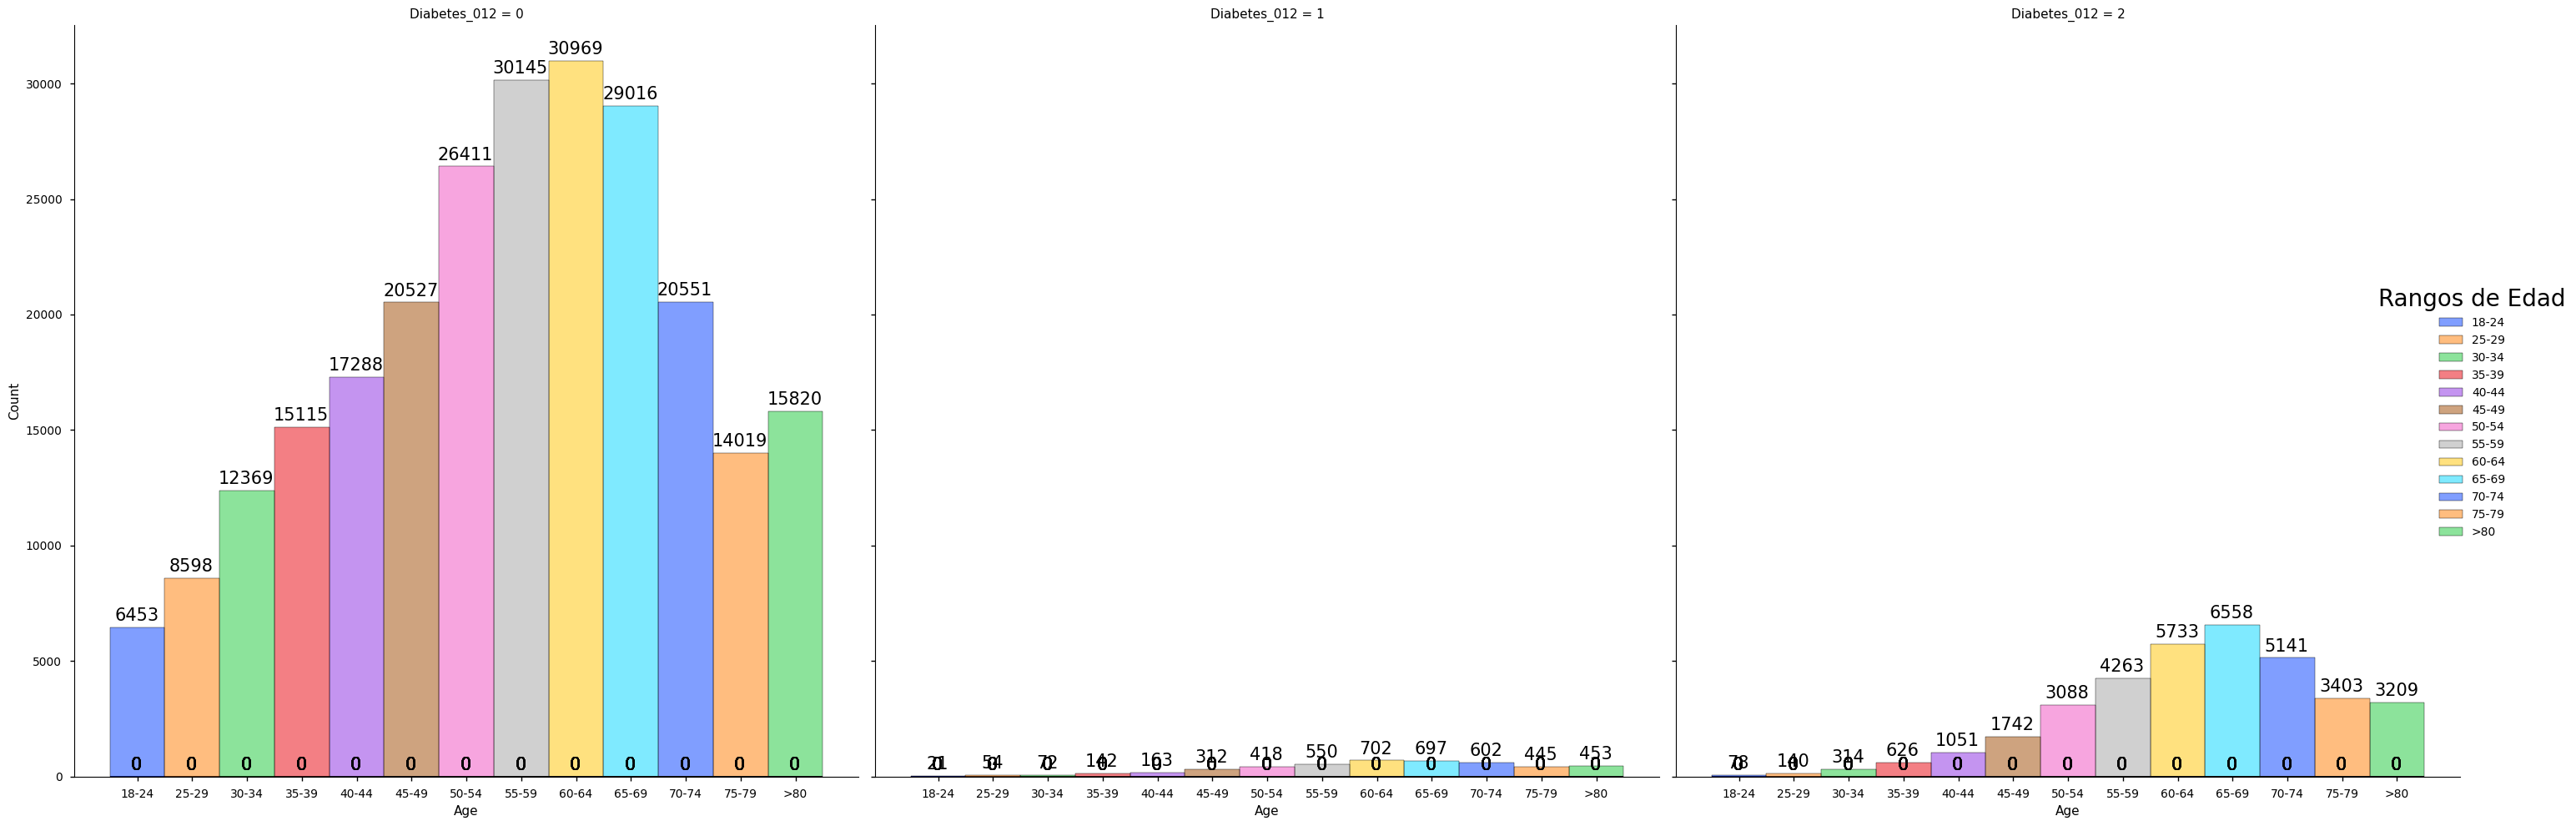

In [29]:
fig4 = sb.displot(Diabetes1_por_año, x="Age",hue="Age",col="Diabetes_012",height=10,aspect=1,palette="bright")
plt.rc("legend",fontsize=20)
new_title = "Rangos de Edad"

fig4.legend.set_title(new_title,{"size":20})
for a in fig4.axes.flat:
    for b in a.patches:
        a.annotate(np.round(b.get_height()), (b.get_x()+p.get_width()/2., b.get_height()), ha="center", va="center", xytext=(17, 10), textcoords="offset points",fontsize=15)

###### Si bien a partir de estos gráficos podemos ver que dentro de los individuos con diabetes la mayoría se encuentra dentro del rango de 55 a 70 años,  se busca pasar los datos a porcentaje para conocer cuánto representan estas cantidades dentro de cada rango. Para ello, se crearon dos vectores principales: Edad_array, el cual cuenta la cantidad de indivduos con cada condición en cada rango de edad, y Edad_array 2, el cual cuenta la cantidad de individuos por rango de edad. El objetivo de estos vectores es dividir el primero por el segundo para conseguir el porcentaje que representan las personas con Diabetes dentro de cada rango:

In [30]:
Edad = Diabetes1_por_año.groupby(["Age","Diabetes_012"]).count()
Casos_edad = Edad.iloc[:39, 0:1]
Casos_edad

HighBP
Age   Diabetes_012        
18-24 0               6453
      1                 21
      2                 78
25-29 0               8598
      1                 54
      2                140
30-34 0              12369
      1                 72
      2                314
35-39 0              15115
      1                142
      2                626
40-44 0              17288
      1                163
      2               1051
45-49 0              20527
      1                312
      2               1742
50-54 0              26411
      1                418
      2               3088
55-59 0              30145
      1                550
      2               4263
60-64 0              30969
      1                702
      2               5733
65-69 0              29016
      1                697
      2               6558
70-74 0              20551
      1                602
      2               5141
75-79 0              14019
      1                445
      2               3403
>80   0              15820
      1                453
      2               3209

In [31]:
Edad_lista = Casos_edad.to_numpy().tolist()

In [32]:
Edad_conteo = Diabetes1_por_año.groupby(["Age"]).count()
Edad_conteo_final = Edad_conteo.iloc[:39, 0:1]
Edad_conteo_final

,Diabetes_012
Age,
18-24,6552
25-29,8792
30-34,12755
35-39,15883
40-44,18502
45-49,22581
50-54,29917
55-59,34958
60-64,37404


In [33]:
Edad_lista2 = Edad_conteo_final.to_numpy().tolist()

In [34]:
Edad_lista3 = [[6552],[6552],[6552],[8792],[8792],[8792],[12755],[12755],[12755],[15883],[15883],[15883],[18502],[18502],[18502],[22581],[22581],[22581],[29917],[29917],[29917],[34958],[34958],[34958],[37404],[37404],[37404],[36271],[36271],[36271],[26294],[26294],[26294],[17867],[17867],[17867],[19482],[19482],[19482]]

In [35]:
Edad_array = np.array(Edad_lista)
Edad_array2 = np.array(Edad_lista3)

Division_edades = Edad_array / Edad_array2 * 100
Division_edades_redondeado=np.round(Division_edades, decimals=0, out=None)


In [36]:
Casos_edad["Porcentaje"] = Division_edades_redondeado

Casos_edad

HighBP  Porcentaje
Age   Diabetes_012                    
18-24 0               6453        98.0
      1                 21         0.0
      2                 78         1.0
25-29 0               8598        98.0
      1                 54         1.0
      2                140         2.0
30-34 0              12369        97.0
      1                 72         1.0
      2                314         2.0
35-39 0              15115        95.0
      1                142         1.0
      2                626         4.0
40-44 0              17288        93.0
      1                163         1.0
      2               1051         6.0
45-49 0              20527        91.0
      1                312         1.0
      2               1742         8.0
50-54 0              26411        88.0
      1                418         1.0
      2               3088        10.0
55-59 0              30145        86.0
      1                550         2.0
      2               4263        12.0
60-64 0              30969        83.0
      1                702         2.0
      2               5733        15.0
65-69 0              29016        80.0
      1                697         2.0
      2               6558        18.0
70-74 0              20551        78.0
      1                602         2.0
      2               5141        20.0
75-79 0              14019        78.0
      1                445         2.0
      2               3403        19.0
>80   0              15820        81.0
      1                453         2.0
      2               3209        16.0

In [37]:
Edades= ("18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79",">80")
Porcentaje_edades=(1,2,2,4,6,8,10,12,15,18,20,19,16)
Porcentaje_edades2 = pd.DataFrame(list(zip(Edades,Porcentaje_edades)), columns = ['Rangos de Edad','Porcentaje con Diabetes'])

Porcentaje_edades2

,Rangos de Edad,Porcentaje con Diabetes
0,18-24,1
1,25-29,2
2,30-34,2
3,35-39,4
4,40-44,6
5,45-49,8
6,50-54,10
7,55-59,12
8,60-64,15
9,65-69,18


<Axes: xlabel='Rangos de Edad', ylabel='Porcentaje con Diabetes'>

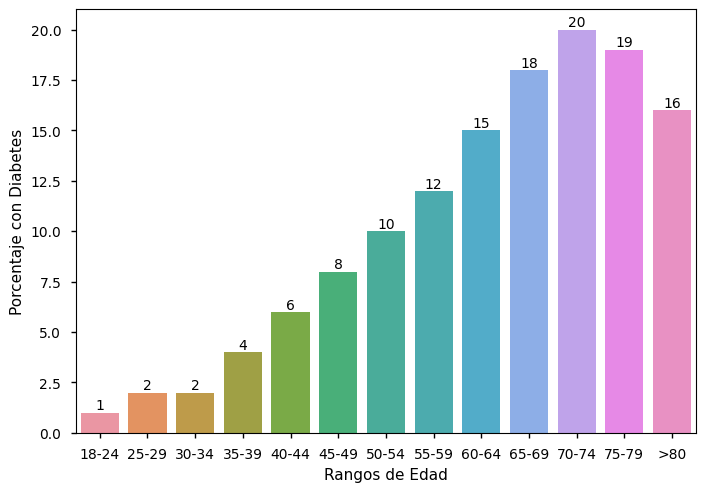

In [38]:
fig5 = sb.barplot(x="Rangos de Edad",y="Porcentaje con Diabetes",data=Porcentaje_edades2)
fig5.bar_label(fig5.containers[0])
fig5

###### En base al gráfico anterior se puede ver una tendencia creciente de casos a medida que aumenta la edad, especialmente hasta los 75 años. Como pequeña aclaración, la caída en el porcentaje de casos que existe en las personas mayores de 75 años puede deberse al margen de error que supone una muestra de este tamaño frente al universo total de individuos y también, y ya como opinión personal, puede estar relacionado con las diferencias en alimentación que existían en la época en que estos individuos eran jóvenes, variable que demostró tener cierta relación con la enfermedad en lo que respecta a comer frutas y verduras, y teniendo en cuenta la infinidad de estudios que existen al respecto de que, si bien la enfermedad puede ser hereditaria, la alimentación es clave. 

##### **Gráficos #6:** Histograma

###### El objetivo de este gráfico es entender la distribución que existe respecto al BMI para las distintas condiciones y a nivel general ya que, como se mencionó anteriormente, el sobrepeso es un factos clave en esta enfermedad. En primer lugar, se extraerán los datos relevantes del Dataset original.

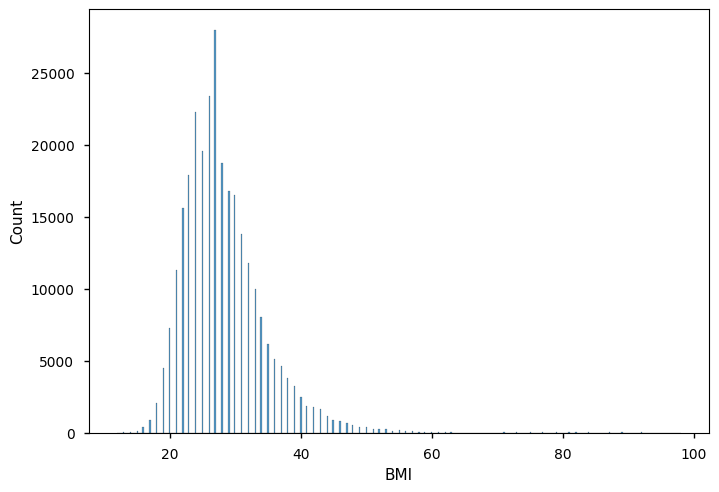

In [39]:
fig6 = sb.histplot(data = Diabetes1, x="BMI")
sb.set(rc = {'figure.figsize':(20,4)})

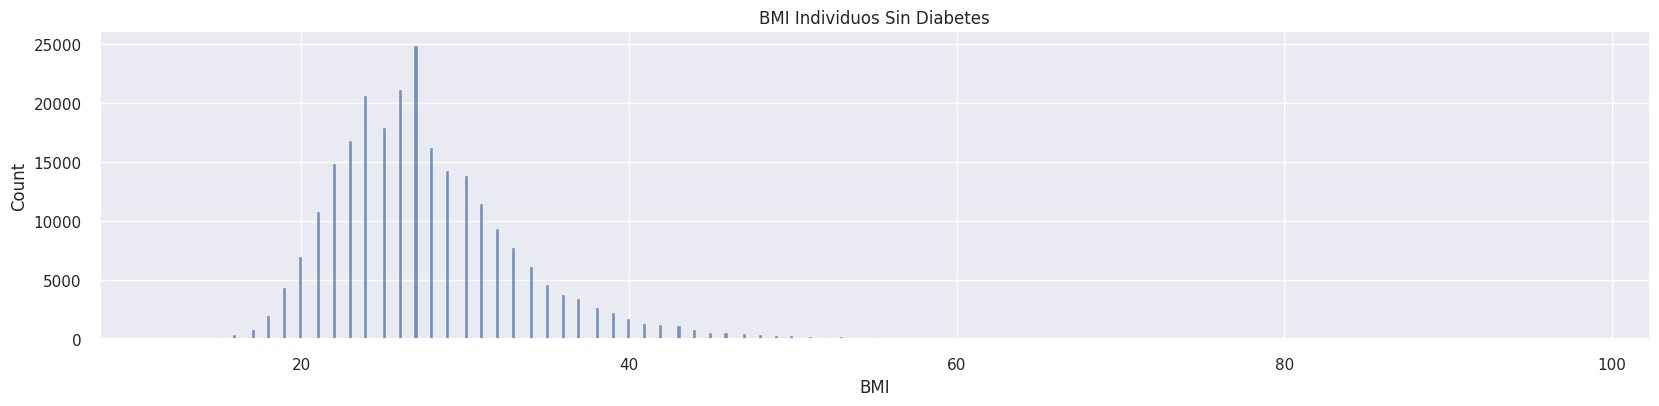

In [40]:
BMI_sin_diabetes=Diabetes1[Diabetes1['Diabetes_012']==0]
BMI_prediabetes=Diabetes1[Diabetes1['Diabetes_012']==1]
BMI_con_diabetes=Diabetes1[Diabetes1['Diabetes_012']==2]

sb.set(rc = {'figure.figsize':(20,4)})
fig7 = sb.histplot(data = BMI_sin_diabetes, x="BMI")
fig7.set_title("BMI Individuos Sin Diabetes")
plt.show()

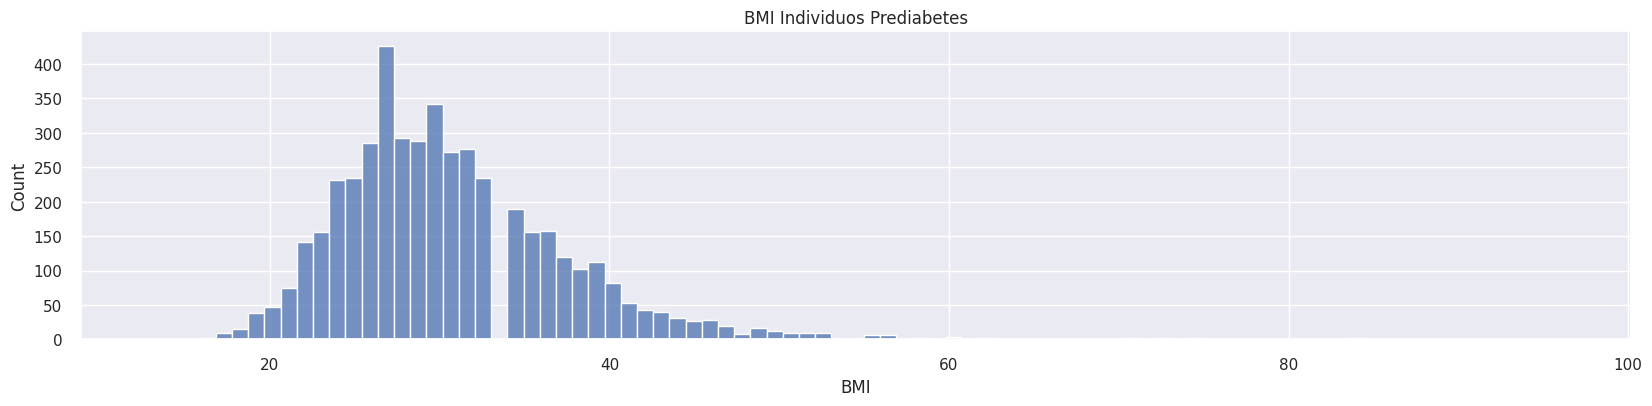

In [41]:
sb.set(rc = {'figure.figsize':(20,4)})
fig8 = sb.histplot(data = BMI_prediabetes, x="BMI")
fig8.set_title("BMI Individuos Prediabetes")
plt.show()

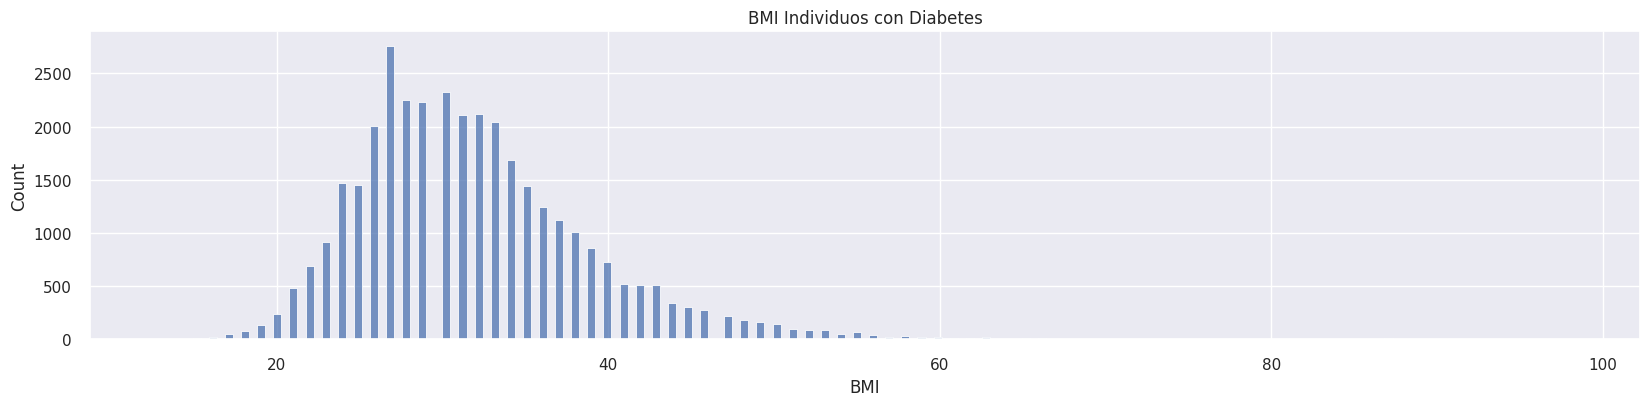

In [42]:
sb.set(rc = {'figure.figsize':(20,4)})
fig9 = sb.histplot(data = BMI_con_diabetes, x="BMI")
fig9.set_title("BMI Individuos con Diabetes")
plt.show()

###### A partir de todos los 4 gráficos se puede vislumbrar que, si bien todos tienen una estructura de campana con una media cercana al 30 (BMI considerado saludable), dentro de las personas con diabetes esta estructura es un poco menos puntiaguda y hay más casos por encima del 30. Cabe mencionar que, si se observan los gráficos de cada condición por separado, se puede ver una tendencia de la campana hacia la derecha (BMI más alto) cuando pasamos a los casos con prediabetes y luego a aquellos con diabetes.

##### **Gráficos #4:** Boxplot

###### El objetivo de este gráfico es entender la relación que existe entre la Salud Mental y Física dentro de las personas que tienen diabetes, para compararlo con la situación en aquellas personas que no tienen:

In [43]:
Con_diabetes = Diabetes1.loc[Diabetes1['Diabetes_012'] == 2]
print(Con_diabetes)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
8                  2       1         1          1   30       1       0   
10                 2       0         0          1   25       1       0   
13                 2       1         1          1   28       0       0   
17                 2       0         0          1   23       1       0   
23                 2       1         0          1   27       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253659             2       0         1          1   37       0       0   
253668             2       0         1          1   29       1       0   
253670             2       1         1          1   25       0       0   
253676             2       1         1          1   18       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
8                          1         

In [44]:
Diabetes_listas = Con_diabetes.to_numpy().transpose().tolist()

In [45]:
Salud_mental = Diabetes_listas[15]

In [46]:
Salud_fisica = Diabetes_listas[16]

In [47]:
Mental_fisica = [Salud_mental,Salud_fisica]

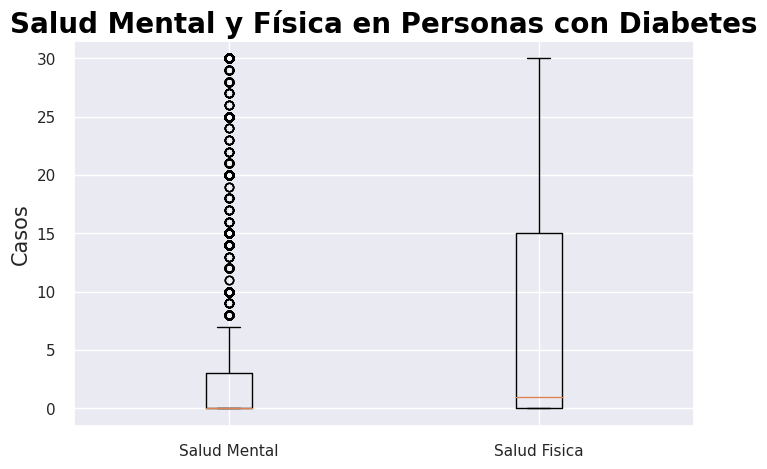

In [48]:
plt.figure(figsize=(8,5))
plt.boxplot(Mental_fisica,labels=["Salud Mental","Salud Fisica"])
plt.title("Salud Mental y Física en Personas con Diabetes",formato_titulo)
plt.ylabel('Casos',fontsize=15)
plt.show()

In [49]:
Sin_diabetes = Diabetes1.loc[Diabetes1['Diabetes_012'] == 0]
Diabetes_listas2 = Sin_diabetes.to_numpy().transpose().tolist()
Salud_fisica2 = Diabetes_listas2[16]
Salud_mental2=Diabetes_listas2[15]
Mental_fisica2 = [Salud_mental2,Salud_fisica2]

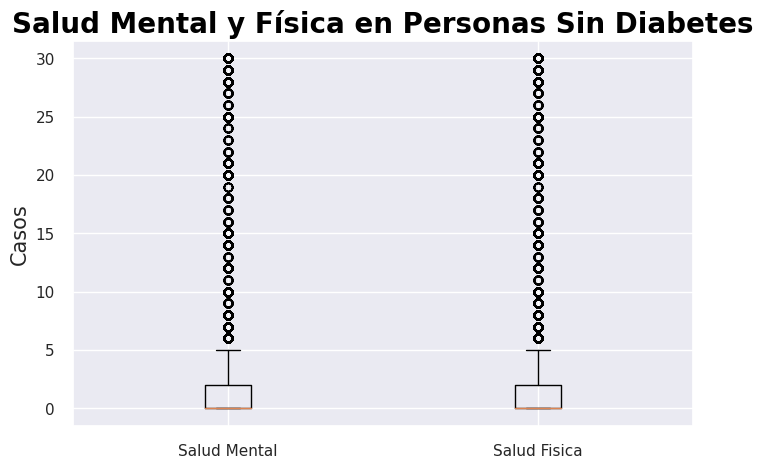

In [50]:
plt.figure(figsize=(8,5))
plt.boxplot(Mental_fisica2,labels=["Salud Mental","Salud Fisica"])
plt.title("Salud Mental y Física en Personas Sin Diabetes",formato_titulo)
plt.ylabel('Casos',fontsize=15)
plt.show()

###### A partir de ambos gráficos se puede ver que aquellas personas que sufren de Diabetes suelen sentirse mal mental y físicamente más veces que aquellas personas sin diabetes. Sin embargo, cabe destacar que esta situación puede ser tanto una consecuencia como no de la enfermedad, en otras palabras, puede ser que aquellas personas con diabetes ya se sintieran mal antes de sufrir la enfermedad. Para ello, se puede evaluar la muestra de personas con prediabetes, a ver si la distribución de ambas variables se modifica fuertemente en relación con los casos de no diabetes:

In [51]:
Con_prediabetes = Diabetes1.loc[Diabetes1['Diabetes_012'] == 1]
Diabetes_listas3 = Con_prediabetes.to_numpy().transpose().tolist()
Salud_fisica3 = Diabetes_listas3[16]
Salud_mental3=Diabetes_listas3[15]
Mental_fisica3 = [Salud_mental3,Salud_fisica3]

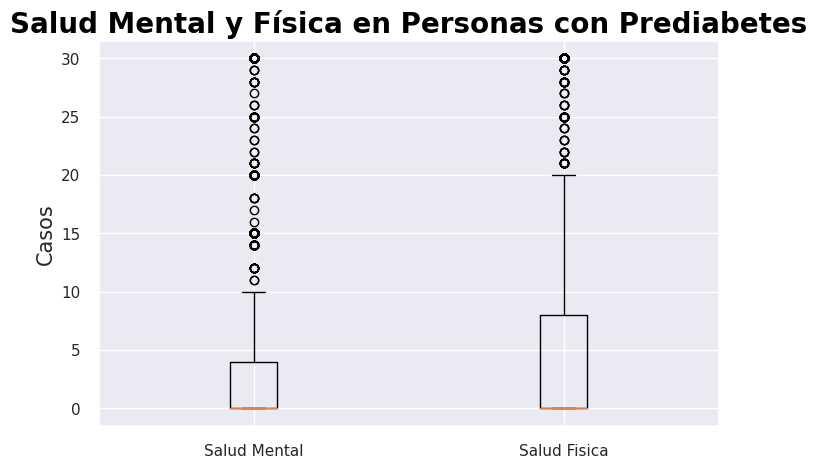

In [52]:
plt.figure(figsize=(8,5))
plt.boxplot(Mental_fisica3,labels=["Salud Mental","Salud Fisica"])
plt.title("Salud Mental y Física en Personas con Prediabetes",formato_titulo)
plt.ylabel('Casos',fontsize=15)
plt.show()

###### A partir de este último gráfico, se verifica que existe una evolución del malestar a medida que los individuos transitan las tres etapas bajo análisis en la cual estos van sintiendose cada vez peor (más en lo físico que en lo mental).

### 4. Muestreo y Modelado

###### A partir del análisis previo, se seleccionará una muestra de 20 mil filas, se evaluará que la misma sea representativa de la muestra total para finalmente emplear un modelo de predicción. En primer lugar, el recorte de la muestra:

In [53]:
Diabetes2 = Diabetes.astype(int)

In [54]:
Diabetes_muestra = Diabetes2.sample(20000)
Diabetes_muestra

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
284941,0,0,0,1,25,1,0,0,1,1,...,1,0,3,7,7,0,0,7,6,8
189748,0,1,1,1,23,1,0,0,1,1,...,1,0,3,0,0,0,1,9,4,6
74270,0,0,0,1,20,0,0,0,1,1,...,1,0,1,1,1,0,0,5,6,8
123588,0,1,0,1,25,0,0,0,1,1,...,1,0,2,0,0,0,0,10,4,8
91711,0,1,0,1,28,0,0,0,0,1,...,1,0,2,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21765,0,1,0,1,26,1,0,0,1,1,...,1,0,3,0,30,0,1,10,6,8
278786,0,0,0,1,23,1,0,0,0,1,...,1,0,2,0,0,1,1,13,4,5
9778,0,1,1,1,31,0,0,0,1,0,...,1,0,2,0,0,0,0,4,4,2
119518,0,0,0,1,20,0,0,0,1,1,...,1,0,2,0,14,0,0,3,6,8


###### Para verificar que la muestra sea representativa se repetirán algunos gráficos del análisis previo:

In [55]:
Muestra_conteo = Diabetes_muestra.groupby(by="Diabetes_012").count()
Muestra_conteo

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,17247,17247,17247,17247,17247,17247,17247,17247,17247,17247,...,17247,17247,17247,17247,17247,17247,17247,17247,17247,17247
1,297,297,297,297,297,297,297,297,297,297,...,297,297,297,297,297,297,297,297,297,297
2,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456


In [56]:
Grupos2 = [17214/20000, 344/20000, 2442/20000]
Grupos_porcentaje2 = np.multiply(Grupos2,100)
Grupos_final2 = list(np.around(np.array(Grupos_porcentaje2),2))

Condiciones = ["No diabetes","Prediabetes","Sí diabetes"]

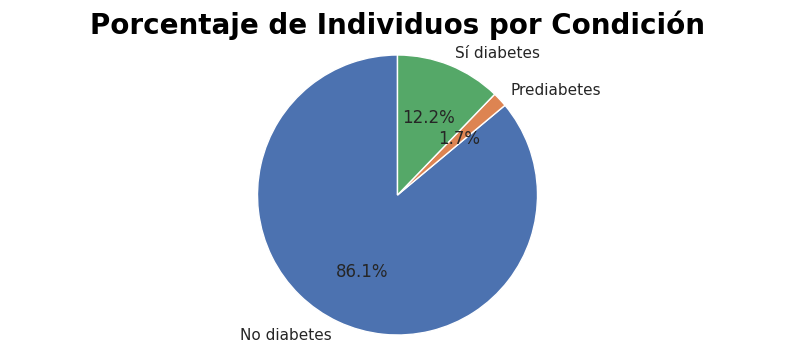

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
ax.pie(Grupos_final2, labels=Condiciones, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')
plt.title("Porcentaje de Individuos por Condición",formato_titulo)

plt.show()

[6249, 6599, 16525, 477632, 7411, 525, 1321, 13555, 11089, 14167, 1081, 16408, 1367, 40874, 50658, 60252, 2246, 7416, 133981, 88309, 107615] [192, 190, 289, 9070, 156, 19, 29, 203, 184, 220, 19, 281, 40, 864, 900, 1614, 73, 131, 2710, 1423, 1642] [1831, 1606, 2438, 78147, 1261, 228, 564, 1559, 1448, 1828, 63, 2361, 252, 8122, 10686, 20107, 920, 1192, 23154, 11645, 12706]


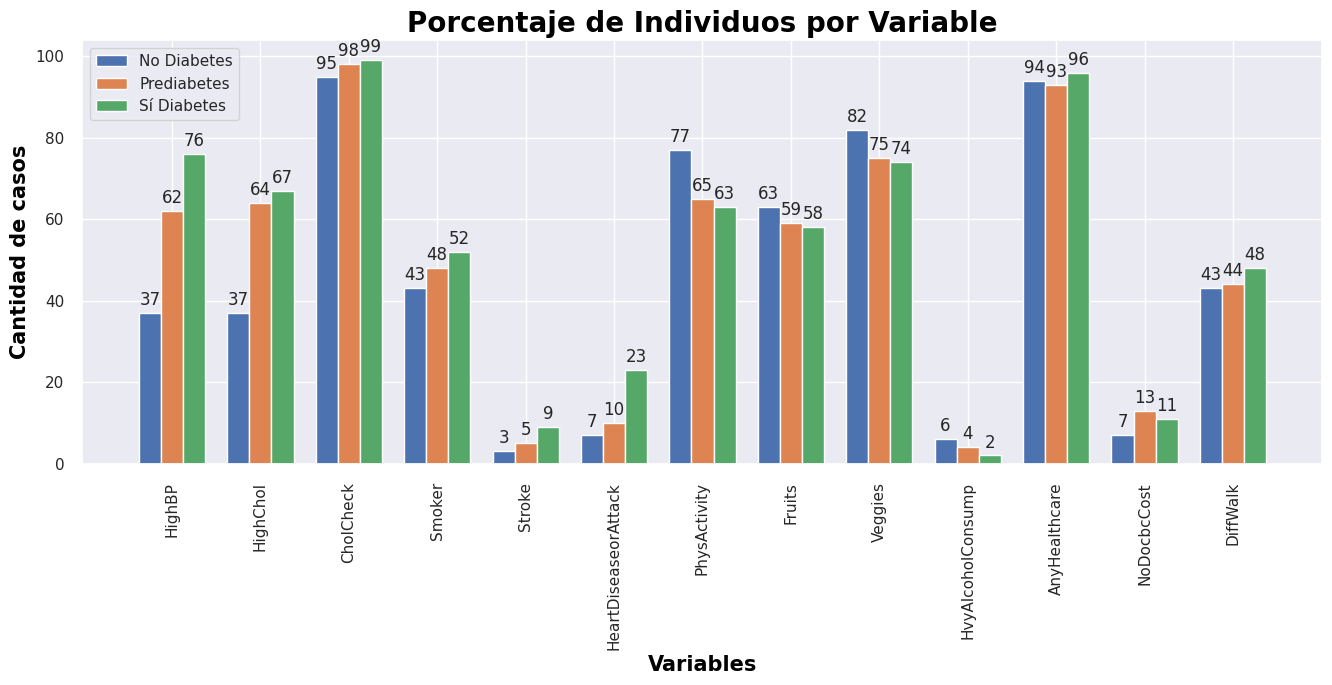

In [58]:
Diabetes_categorias2 = Diabetes_muestra.groupby(by="Diabetes_012").sum()
Listas_diabetes2 = Diabetes_categorias2.to_numpy().tolist()
No_diabetes2 = Listas_diabetes2[0]
Prediabetes2 =Listas_diabetes2[1]
Si_diabetes2 = Listas_diabetes2[2]

print(No_diabetes2, Prediabetes2, Si_diabetes2)
No_diabetes_cortado2 =[6435, 6485, 16496,7441, 557, 1260, 13426, 10952, 14199, 1082, 16337, 1357,7471]
Prediabetes_cortado2 = [214, 223, 338,168, 19, 37, 224, 205, 260, 17, 322, 48,153]
Si_diabetes_cortado2 = [1857, 1658, 2427, 1273, 226, 581, 1554, 1439, 1821, 67, 2351, 280,1173]
columnas = ('HighBP', 'HighChol', 'CholCheck', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk')

No_diabetes_division2 = list(map(lambda x: x / 17214, No_diabetes_cortado2)) 
No_diabetes_porcentaje2 = np.multiply(No_diabetes_division2,100)


Prediabetes_division2 = list(map(lambda x: x / 344, Prediabetes_cortado2)) 
Prediabetes_porcentaje2 = np.multiply(Prediabetes_division2,100)

Si_diabetes_division2 = list(map(lambda x: x / 2442, Si_diabetes_cortado2)) 
Si_diabetes_porcentaje2 = np.multiply(Si_diabetes_division2,100)

No_diabetes_final2=No_diabetes_porcentaje2.astype(int)
Prediabetes_final2 = Prediabetes_porcentaje2.astype(int)
Si_diabetes_final2 = Si_diabetes_porcentaje2.astype(int)


x = np.arange(len(columnas))
width = 0.25
plt.figure(figsize=(16,5.5))

pps2 = plt.bar(x - width, No_diabetes_final2, width, label='No Diabetes')
for p in pps2:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha="center", va="bottom")

pps2 = plt.bar(x, Prediabetes_final2, width, label='Prediabetes')
for p in pps2:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3),
      textcoords="offset points",
      ha="center", va="bottom")

pps2 = plt.bar(x + width, Si_diabetes_final2, width, label ="Sí Diabetes")
for p in pps2:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3),
      textcoords="offset points",
      ha="center", va="bottom")

plt.title("Porcentaje de Individuos por Variable",fontdict=formato_titulo)  
plt.xlabel("Variables",fontdict=formato_xy) 
plt.ylabel("Cantidad de casos",fontdict=formato_xy)

plt.legend(loc="upper left") 

plt.xticks(x, columnas)
plt.xticks(rotation=90)
plt.show()

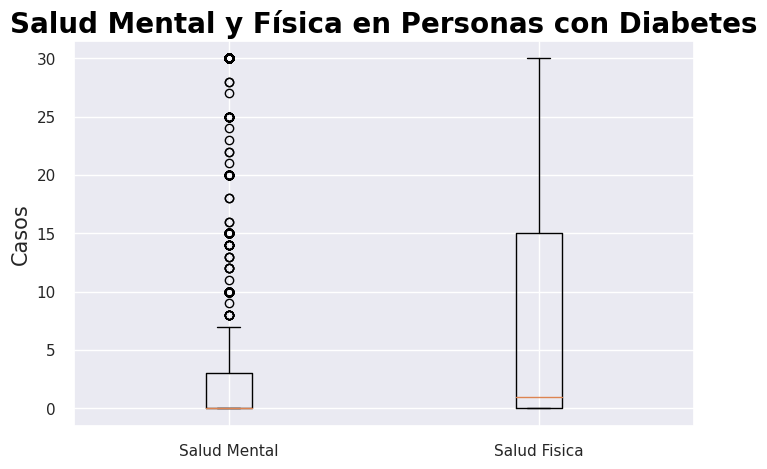

In [59]:
Con_diabetes4 = Diabetes_muestra.loc[Diabetes_muestra['Diabetes_012'] == 2]
Diabetes_listas4 = Con_diabetes4.to_numpy().transpose().tolist()
Salud_mental4 = Diabetes_listas4[15]
Salud_fisica4 = Diabetes_listas4[16]
Mental_fisica4 = [Salud_mental4,Salud_fisica4]
plt.figure(figsize=(8,5))
plt.boxplot(Mental_fisica4,labels=["Salud Mental","Salud Fisica"])
plt.title("Salud Mental y Física en Personas con Diabetes",formato_titulo)
plt.ylabel('Casos',fontsize=15)
plt.show()

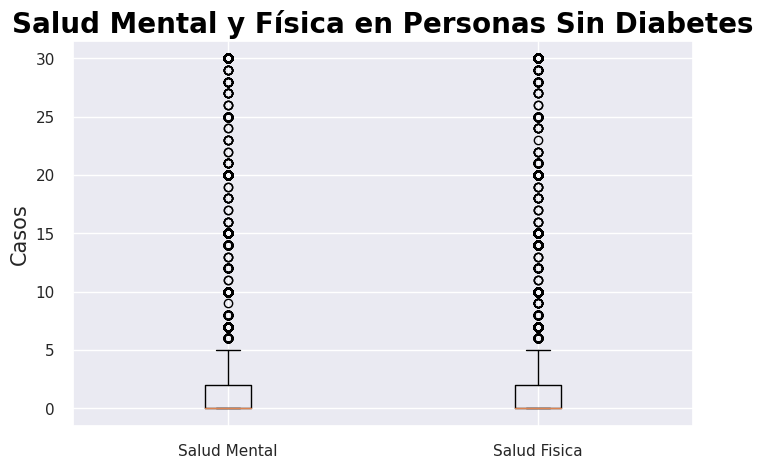

In [60]:
Sin_diabetes5 = Diabetes_muestra.loc[Diabetes_muestra['Diabetes_012'] == 0]
Diabetes_listas5 = Sin_diabetes5.to_numpy().transpose().tolist()
Salud_fisica5 = Diabetes_listas5[16]
Salud_mental5=Diabetes_listas5[15]
Mental_fisica5 = [Salud_mental5,Salud_fisica5]
plt.figure(figsize=(8,5))
plt.boxplot(Mental_fisica5,labels=["Salud Mental","Salud Fisica"])
plt.title("Salud Mental y Física en Personas Sin Diabetes",formato_titulo)
plt.ylabel('Casos',fontsize=15)
plt.show()

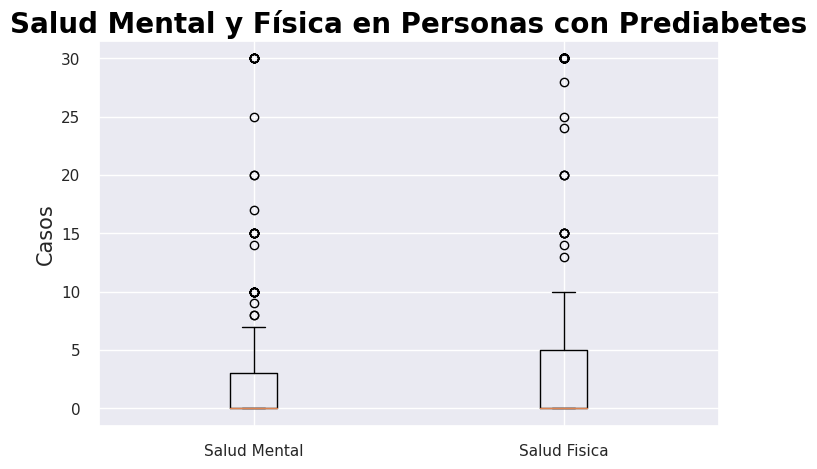

In [61]:
Con_prediabetes6 = Diabetes_muestra.loc[Diabetes_muestra['Diabetes_012'] == 1]
Diabetes_listas6 = Con_prediabetes6.to_numpy().transpose().tolist()
Salud_fisica6 = Diabetes_listas6[16]
Salud_mental6 = Diabetes_listas6[15]
Mental_fisica6 = [Salud_mental6,Salud_fisica6]
plt.figure(figsize=(8,5))
plt.boxplot(Mental_fisica6,labels=["Salud Mental","Salud Fisica"])
plt.title("Salud Mental y Física en Personas con Prediabetes",formato_titulo)
plt.ylabel('Casos',fontsize=15)
plt.show()

###### Como puede apreciarse en los gráficos anteriores, la muestra es representativa del total. Ahora bien, para el modelado se utilizarán el Arbol de Decisión y la Regresión Logística con el objetivo de comparar los resultados a ver qué modelo es más preciso. Cabe mencionar que, previo a la aplicación de los modelos, en primer lugar, se define la variable X como el dataframe Diabetes_muestra sin la columna en la cual se indica la condición de cada individuo y luego se define la variable Y que será dicha condición. En segundo lugar, se definen las muestras que se utilizarán para el entrenamiento y el testeo del modelo.

In [62]:
x = Diabetes_muestra.drop("Diabetes_012",axis=1)
y = Diabetes_muestra["Diabetes_012"]

print(x.shape, y.shape)

(20000, 21) (20000,)


In [63]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y  ,test_size = 0.20, random_state=42)

x_train.shape , y_train.shape , x_test.shape , y_test.shape 

((16000, 21), (16000,), (4000, 21), (4000,))

##### **Árbol de Decisión**

In [64]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
Modelo1 = DecisionTreeClassifier(random_state=1234,criterion="gini",max_depth=5)
Modelo2 = Modelo1.fit(x_train, y_train)

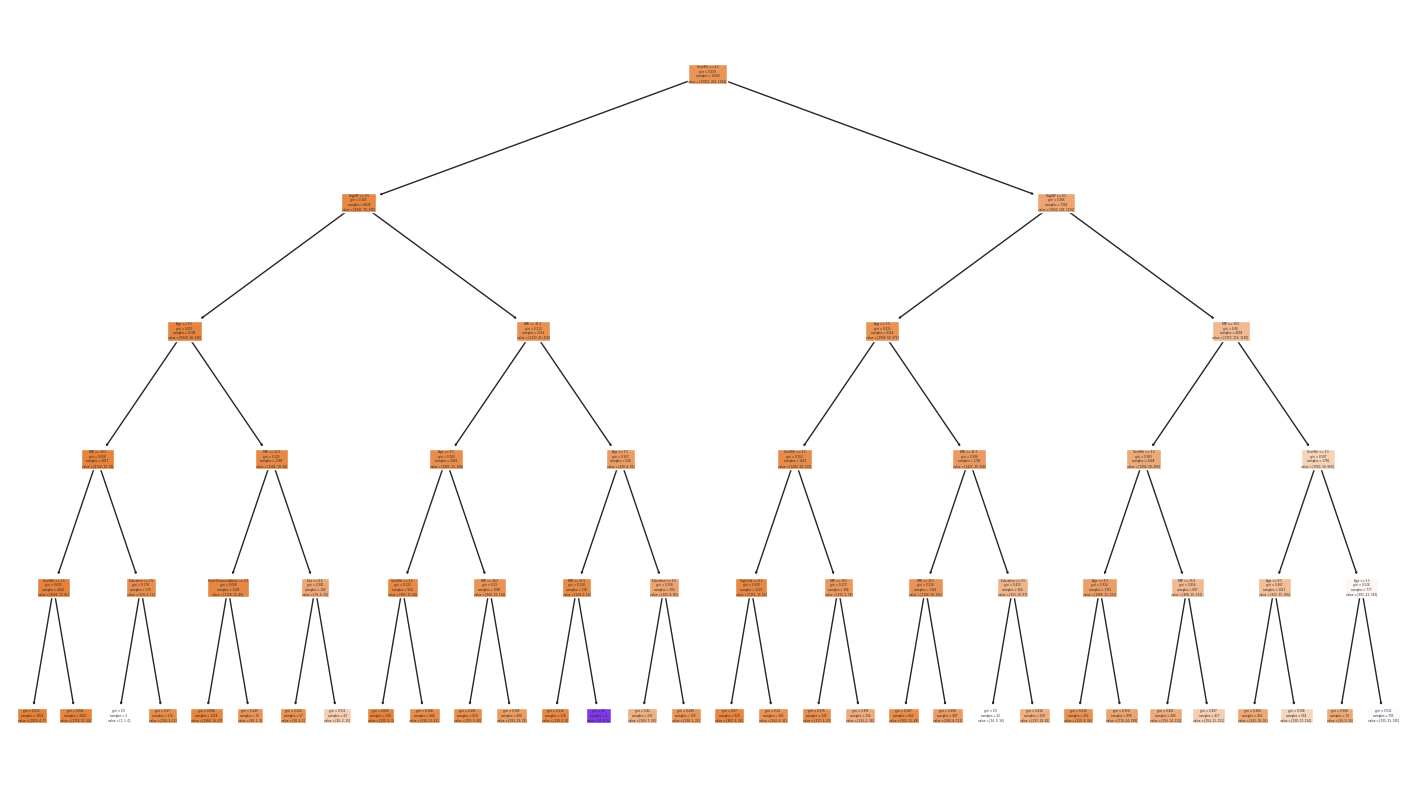

In [65]:
fig11 = plt.figure(figsize=(18,10))
fig12 = tree.plot_tree(Modelo1,feature_names=x_train.columns,filled=True)
plt.savefig("decision_tree.png", bbox_inches="tight")

In [66]:
from sklearn.metrics import classification_report
y_pred=Modelo1.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3426
           1       0.00      0.00      0.00        52
           2       0.47      0.18      0.26       522

    accuracy                           0.85      4000
   macro avg       0.45      0.38      0.39      4000
weighted avg       0.81      0.85      0.82      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### **Regresión Logística**

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000, n_jobs=-1) 
model.fit(x_train, y_train) 
predicciones = model.predict(x_test)
predicciones[0:5]

model.predict_proba(x_test)

array([[0.98535977, 0.00306577, 0.01157445],
       [0.91605091, 0.02210882, 0.06184026],
       [0.87066543, 0.01450065, 0.11483392],
       ...,
       [0.95328665, 0.00766502, 0.03904833],
       [0.91969477, 0.00747517, 0.07283007],
       [0.97040148, 0.00579751, 0.02380101]])

In [68]:
print(classification_report(y_true=y_test,y_pred=predicciones))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      3426
           1       0.00      0.00      0.00        52
           2       0.59      0.16      0.25       522

    accuracy                           0.86      4000
   macro avg       0.49      0.38      0.39      4000
weighted avg       0.83      0.86      0.83      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Como podemos apreciar, ninguno de los dos modelos logra un nivel aceptable de predicción por lo que se intentará "emparejar" la cantidad de casos con cada condición de diabetes para probar si esto ayuda a los modelos:

In [69]:
Sin_diabetes2 = Diabetes_muestra.loc[Diabetes_muestra["Diabetes_012"] == 0]
Sin_diabetes2.shape

(17247, 22)

In [70]:
Sin_diabetes_cortado = Sin_diabetes2.iloc[-2500:]
Sin_diabetes_cortado.shape

(2500, 22)

In [71]:
Con_diabetes2 = Diabetes_muestra.loc[Diabetes_muestra["Diabetes_012"] == 2]
print(Sin_diabetes_cortado.shape,Con_diabetes2.shape)

(2500, 22) (2456, 22)


In [72]:
Diabetes_acotado = pd.concat([Sin_diabetes_cortado,Con_diabetes2])
Diabetes_acotado

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
19965,0,1,0,1,33,0,0,0,1,0,...,1,0,3,0,0,1,1,12,5,1
261939,0,0,0,1,22,1,0,0,1,1,...,1,0,2,5,2,0,0,3,4,8
144213,0,0,1,1,23,0,0,0,1,1,...,1,0,1,0,0,0,0,8,4,8
53041,0,0,0,1,24,0,0,0,1,0,...,1,0,2,0,0,0,0,11,6,8
208729,0,0,0,1,22,0,0,0,0,1,...,1,0,2,0,0,0,0,7,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235818,2,1,1,1,35,1,0,0,0,1,...,1,0,4,4,30,1,0,11,5,6
200530,2,0,0,1,39,1,0,0,1,1,...,1,0,2,0,0,0,1,5,6,7
51296,2,1,1,1,42,0,0,0,0,1,...,1,0,4,0,30,1,0,11,5,7
81154,2,1,0,1,39,0,0,0,1,0,...,1,0,3,0,0,0,0,7,6,7


###### Se vuelven a testear los modelos:

##### **Árbol de Decisión #2**

In [73]:
a = Diabetes_acotado.drop("Diabetes_012",axis=1)
b = Diabetes_acotado["Diabetes_012"]

print(a.shape, b.shape)

x_train , x_test , y_train , y_test = train_test_split(a , b  ,test_size = 0.20, random_state=42)

x_train.shape , y_train.shape , x_test.shape , y_test.shape 

(4956, 21) (4956,)


((3964, 21), (3964,), (992, 21), (992,))

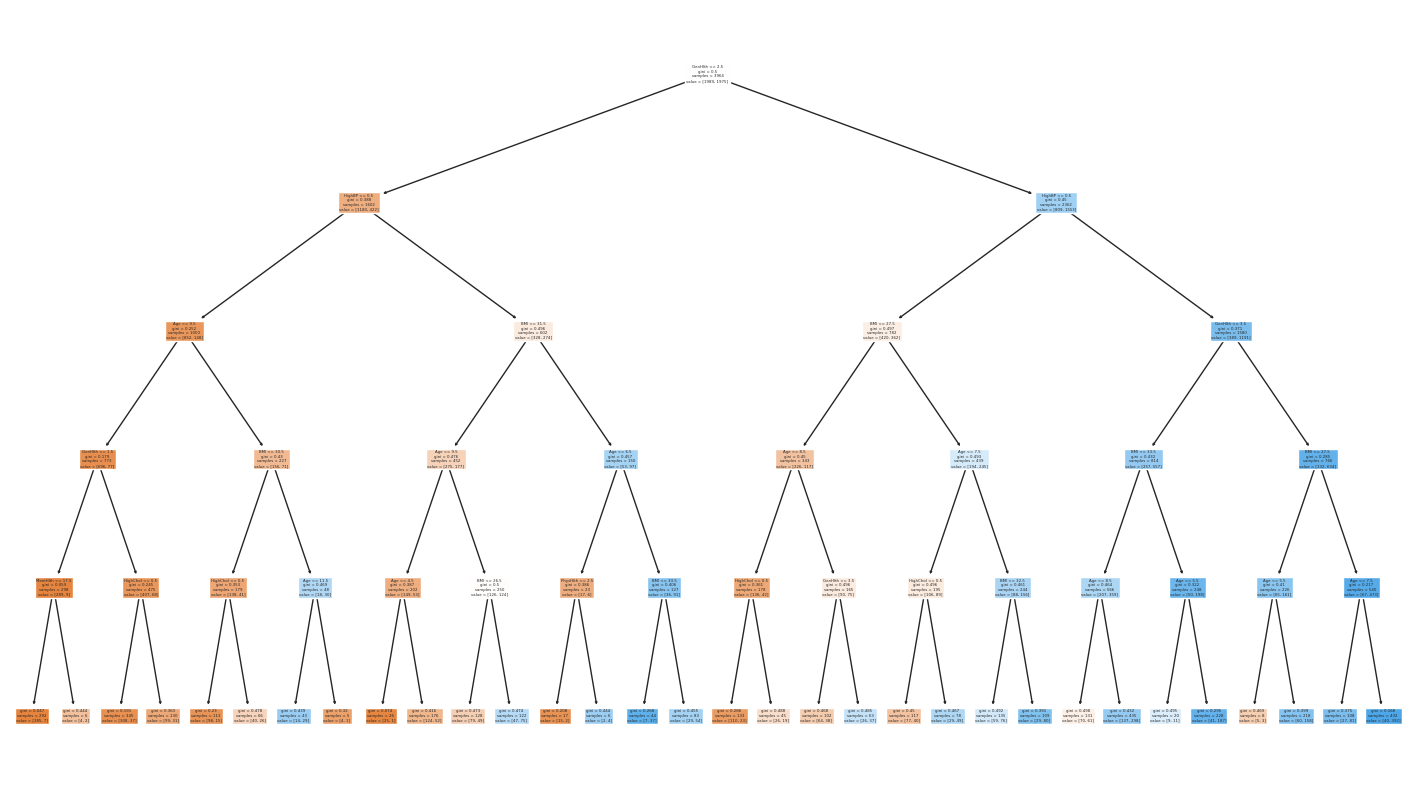

In [74]:
Modelo3 = DecisionTreeClassifier(random_state=1234,criterion="gini",max_depth=5)
Modelo4 = Modelo3.fit(x_train, y_train)

fig13 = plt.figure(figsize=(18,10))
fig14 = tree.plot_tree(Modelo3,feature_names=x_train.columns,filled=True)
plt.savefig("decision_tree.png", bbox_inches="tight")

In [75]:
y_pred = Modelo3.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       511
           2       0.68      0.78      0.73       481

    accuracy                           0.71       992
   macro avg       0.72      0.72      0.71       992
weighted avg       0.72      0.71      0.71       992



##### **Regresión Logística #2**

In [76]:
model1 = LogisticRegression(max_iter=10000, n_jobs=-1) 
model1.fit(x_train, y_train) 
predicciones1 = model1.predict(x_test)
predicciones1[0:5]
model1.predict_proba(x_test)

array([[0.19661386, 0.80338614],
       [0.79752951, 0.20247049],
       [0.59796709, 0.40203291],
       ...,
       [0.640627  , 0.359373  ],
       [0.58624529, 0.41375471],
       [0.24975381, 0.75024619]])

In [77]:
print(classification_report(y_true=y_test,y_pred=predicciones1))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       511
           2       0.72      0.80      0.76       481

    accuracy                           0.75       992
   macro avg       0.76      0.76      0.75       992
weighted avg       0.76      0.75      0.75       992



###### Como es evidente, el haber acotado la base de datos y el haber emparejado la cantidad de casos para cada condición ha permitido mejorar la exactitud de ambos modelos, siendo el de Regresión Logística levemente mejor que el Árbol de Decisión. Sin embargo, la idea es mejorar aún más la precisión del modelo por lo que se aplicaran Wrapped Methods para verificar cuáles son las variables más relevantes y así correr el modelo solo teniendo éstas en cuenta.


##### **Forward Selection:**

In [78]:
import statsmodels.api as sm
def forward_selection(a, b, significance_level=0.01):
    initial_features = a.columns.tolist() 
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(b, sm.add_constant(a[best_features+[new_column]])).fit() 
            new_pval[new_column] = model.pvalues[new_column] 
        min_p_value = new_pval.min() 
        if(min_p_value<significance_level): 
            best_features.append(new_pval.idxmin()) 
        else:
            break 
    return best_features

In [79]:
import warnings
warnings.filterwarnings("ignore")
forward_selection(a,b)

['GenHlth',
 'HighBP',
 'BMI',
 'Age',
 'HighChol',
 'Income',
 'Sex',
 'HvyAlcoholConsump',
 'CholCheck']

In [80]:
Forward_sel = a.drop(['Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education'],axis=1)

In [81]:
a1 = Forward_sel
b1= Diabetes_acotado["Diabetes_012"]

print(a1.shape, b1.shape)

x_train , x_test , y_train , y_test = train_test_split(a1 , b1  ,test_size = 0.20, random_state=42)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

(4956, 10) (4956,)


((3964, 10), (3964,), (992, 10), (992,))

In [82]:
model2 = LogisticRegression(max_iter=10000, n_jobs=-1) 
model2.fit(x_train, y_train) 
predicciones2 = model2.predict(x_test)
predicciones2[0:5]
model2.predict_proba(x_test)

array([[0.23075591, 0.76924409],
       [0.75284503, 0.24715497],
       [0.60631298, 0.39368702],
       ...,
       [0.60709559, 0.39290441],
       [0.57014867, 0.42985133],
       [0.262672  , 0.737328  ]])

In [83]:
print(classification_report(y_true=y_test,y_pred=predicciones2))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       511
           2       0.72      0.80      0.76       481

    accuracy                           0.75       992
   macro avg       0.76      0.75      0.75       992
weighted avg       0.76      0.75      0.75       992



###### Como se puede ver, la aplicación del Forward Selection no ha mejorado el modelo.


##### **Backwards Selection:**

In [84]:
def backward_elimination(a, b,significance_level = 0.05):
    features = a.columns.tolist() 
    while(len(features)>0):
        features_with_constant = sm.add_constant(a[features]) 
        p_values = sm.OLS(b, features_with_constant).fit().pvalues[1:] 
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax() 
            features.remove(excluded_feature) 
        else:
            break 
    return features

In [85]:
backward_elimination(a,b)

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'HvyAlcoholConsump',
 'GenHlth',
 'Sex',
 'Age',
 'Education',
 'Income']

In [86]:
Backwards_sel = a.drop(['CholCheck', 'Smoker', 'Stroke','PhysActivity', 'Fruits', 'Veggies','AnyHealthcare','MentHlth', 'PhysHlth', 'DiffWalk'],axis=1)

In [87]:
a2 = Backwards_sel
b2= Diabetes_acotado["Diabetes_012"]

print(a2.shape, b2.shape)

x_train , x_test , y_train , y_test = train_test_split(a2 , b2  ,test_size = 0.20, random_state=42)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

(4956, 11) (4956,)


((3964, 11), (3964,), (992, 11), (992,))

In [88]:
model3 = LogisticRegression(max_iter=10000, n_jobs=-1) 
model3.fit(x_train, y_train) 
predicciones3 = model3.predict(x_test)
predicciones3[0:5]
model3.predict_proba(x_test)

array([[0.21629155, 0.78370845],
       [0.80613856, 0.19386144],
       [0.62531166, 0.37468834],
       ...,
       [0.62045754, 0.37954246],
       [0.58596231, 0.41403769],
       [0.27480354, 0.72519646]])

In [89]:
print(classification_report(y_true=y_test,y_pred=predicciones3))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       511
           2       0.73      0.79      0.76       481

    accuracy                           0.76       992
   macro avg       0.76      0.76      0.76       992
weighted avg       0.76      0.76      0.76       992



###### Como se puede ver, la aplicación del Backwards Selection no ha mejorado el modelo, incluso lo ha empeorado.


##### **Stepwise Selection:**

In [90]:
def stepwise_selection(a, b,SL_in=0.05,SL_out = 0.05):
    initial_features = a.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(b, sm.add_constant(a[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(a[best_features])
                p_values = sm.OLS(b, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [91]:
stepwise_selection(a,b)

['GenHlth',
 'HighBP',
 'BMI',
 'Age',
 'HighChol',
 'Income',
 'Sex',
 'HvyAlcoholConsump',
 'CholCheck',
 'Education']

In [92]:
Sidewise_sel = a.drop(['Smoker', 'Stroke','Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Education'],axis=1)

In [93]:
a3 = Sidewise_sel
b3= Diabetes_acotado["Diabetes_012"]

print(a3.shape, b3.shape)

x_train , x_test , y_train , y_test = train_test_split(a3 , b3  ,test_size = 0.20, random_state=42)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

(4956, 11) (4956,)


((3964, 11), (3964,), (992, 11), (992,))

In [94]:
model4 = LogisticRegression(max_iter=10000, n_jobs=-1) 
model4.fit(x_train, y_train) 
predicciones4 = model4.predict(x_test)
predicciones4[0:5]
model4.predict_proba(x_test)

array([[0.21583883, 0.78416117],
       [0.73542113, 0.26457887],
       [0.58597782, 0.41402218],
       ...,
       [0.58361593, 0.41638407],
       [0.57748979, 0.42251021],
       [0.24643375, 0.75356625]])

In [95]:
print(classification_report(y_true=y_test,y_pred=predicciones4))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       511
           2       0.72      0.80      0.76       481

    accuracy                           0.75       992
   macro avg       0.76      0.76      0.75       992
weighted avg       0.76      0.75      0.75       992



###### Finalmente se puede ver como ninguno de los tres métodos de selección de variables más relevantes ha logrado mejorar la precisión del modelo.

##### **Overfitting y Underfitting:**
###### En esta sección se analizará la precisión del Modelo de Regresión Logística 2 dado que posee todas las variables y mantiene la misma precisión que si se las hubiera acotado:

In [96]:
a = Diabetes_acotado.drop("Diabetes_012",axis=1)
b = Diabetes_acotado["Diabetes_012"]

print(a.shape, b.shape)

x_train , x_test , y_train , y_test = train_test_split(a , b  ,test_size = 0.20, random_state=42)

x_train.shape , y_train.shape , x_test.shape , y_test.shape 

(4956, 21) (4956,)


((3964, 21), (3964,), (992, 21), (992,))

In [97]:
print(classification_report(y_true=y_test,y_pred=predicciones1))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       511
           2       0.72      0.80      0.76       481

    accuracy                           0.75       992
   macro avg       0.76      0.76      0.75       992
weighted avg       0.76      0.75      0.75       992



In [98]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [99]:
x, y = make_classification(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(a, b,random_state=0)
clf = SVC(random_state=0)
clf.fit(x_train, y_train)
SVC(random_state=0)

Predicciones = clf.predict(x_test)

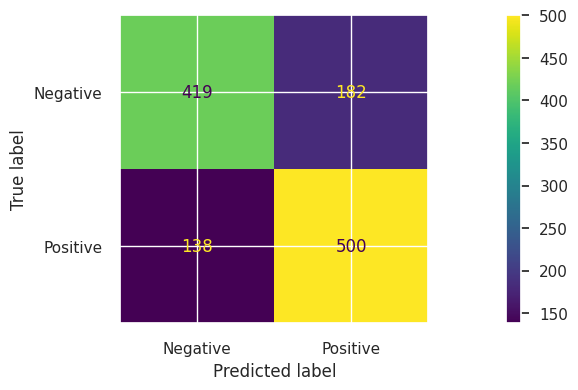

In [100]:
CM = confusion_matrix(y_test, Predicciones, labels=clf.classes_)
DISP = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Negative', 'Positive'])
DISP.plot() 

In [101]:
Precision = metrics.accuracy_score(y_test, Predicciones)
Precision 

0.741727199354318

In [102]:
print(metrics.classification_report(y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       601
           2       0.73      0.78      0.76       638

    accuracy                           0.74      1239
   macro avg       0.74      0.74      0.74      1239
weighted avg       0.74      0.74      0.74      1239



###### Se puede ver que el 75% de los casos la predicción es correcta, lo cual refleja un poco menos de precisión en base a lo visto anteriormente en el modelo de Regresión Logística. Asimismo, se resaltan los siguientes puntos:
* ###### Hay mayor precisión en la detección de casos SIN DIABETES.
* ###### Hay mayor sensibilidad y especificidad en la detección de casos CON DIABETES.
* ###### La medida de precisión F1 es más precisa en la detección de casos CON DIABETES.

###### A partir de esta información se puede verificar que, si bien el modelo tiene tendencia a acertar los resultados, aún no está cómodo y por eso tiene probabilidades medias de predicción. En otras palabras, podría decirse que el modelo sufre de cierto underfitting que, en base a lo analizado hasta acá, podría intentar corregirse utilizando un modelo más complejo ya que otras soluciones como la eliminación de variables han demostrado no ser útiles.



### 5. API CDC Diabetes

###### El objetivo de la presente sección es incorporar información adicional a partir del uso de la API pública de los Centros para el Control y la Prevención de Enfermedades (CDC). El dataset representa un subconjunto filtrado de los datos de 500 Ciudades que proporciona estimaciones de cada área basadas en modelos para 27 medidas de enfermedades crónicas relacionadas con comportamientos poco saludables (5), resultados de salud (13) y uso de servicios preventivos (9). Incluye estimaciones para las 500 ciudades más grandes de los Estados Unidos y el objetivo del mismo es que se lo pueda utilizar para identificar problemas de salud emergentes y para informar el desarrollo e implementación de actividades efectivas y específicas de prevención.

In [103]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


In [104]:
from sodapy import Socrata
client = Socrata("chronicdata.cdc.gov", None)

results = client.get("cn78-b9bj", limit=2000)

diabetes_cdc= pd.DataFrame.from_records(results)

diabetes_cdc

,uniqueid,cityname,geolocation,populationcount,data_value,measure,tractfips,low_confidence_limit,high_confidence_limit,geographiclevel,...,year,cityfips,data_value_type,stateabbr,short_question_text,measureid,statedesc,datavaluetypeid,data_value_footnote,data_value_footnote_symbol
0,0636546-06037601801,Inglewood,"{'latitude': '33.9439711273', 'human_address':...",2472,12.7,Diagnosed diabetes among adults aged >=18 Years,06037601801,12.0,13.5,Census Tract,...,2017,0636546,Crude prevalence,CA,Diabetes,DIABETES,California,CrdPrv,NaN,NaN
1,0137000-01089002922,Huntsville,"{'latitude': '34.612755588', 'human_address': ...",4387,9.3,Diagnosed diabetes among adults aged >=18 Years,01089002922,8.5,10.3,Census Tract,...,2017,0137000,Crude prevalence,AL,Diabetes,DIABETES,Alabama,CrdPrv,NaN,NaN
2,0203000-02020002501,Anchorage,"{'latitude': '61.1593945029', 'human_address':...",4993,7.4,Diagnosed diabetes among adults aged >=18 Years,02020002501,6.9,7.8,Census Tract,...,2017,0203000,Crude prevalence,AK,Diabetes,DIABETES,Alaska,CrdPrv,NaN,NaN
3,0473000-04013319907,Tempe,"{'latitude': '33.3419171912', 'human_address':...",2225,7.0,Diagnosed diabetes among adults aged >=18 Years,04013319907,6.4,7.9,Census Tract,...,2017,0473000,Crude prevalence,AZ,Diabetes,DIABETES,Arizona,CrdPrv,NaN,NaN
4,0485540,Yuma,"{'latitude': '32.5986027117', 'human_address':...",93064,11.1,Diagnosed diabetes among adults aged >=18 Years,NaN,11.0,11.3,City,...,2017,0485540,Crude prevalence,AZ,Diabetes,DIABETES,Arizona,CrdPrv,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0624680-06071002037,Fontana,"{'latitude': '34.1223871311', 'human_address':...",7739,8.8,Diagnosed diabetes among adults aged >=18 Years,06071002037,8.3,9.2,Census Tract,...,2017,0624680,Crude prevalence,CA,Diabetes,DIABETES,California,CrdPrv,NaN,NaN
1996,0633000-06001437200,Hayward,"{'latitude': '37.6432042264', 'human_address':...",6573,10.6,Diagnosed diabetes among adults aged >=18 Years,06001437200,10.1,11.2,Census Tract,...,2017,0633000,Crude prevalence,CA,Diabetes,DIABETES,California,CrdPrv,NaN,NaN
1997,0627000-06019003809,Fresno,"{'latitude': '36.793027262', 'human_address': ...",4720,10.0,Diagnosed diabetes among adults aged >=18 Years,06019003809,9.5,10.4,Census Tract,...,2017,0627000,Crude prevalence,CA,Diabetes,DIABETES,California,CrdPrv,NaN,NaN
1998,0627000-06019004703,Fresno,"{'latitude': '36.7901385564', 'human_address':...",4218,13.3,Diagnosed diabetes among adults aged >=18 Years,06019004703,12.6,13.9,Census Tract,...,2017,0627000,Crude prevalence,CA,Diabetes,DIABETES,California,CrdPrv,NaN,NaN


In [105]:
diabetes_cdc.shape

(2000, 26)

In [106]:
diabetes_cdc.columns

Index(['uniqueid', 'cityname', 'geolocation', 'populationcount', 'data_value',
       'measure', 'tractfips', 'low_confidence_limit', 'high_confidence_limit',
       'geographiclevel', ':@computed_region_bxsw_vy29', 'datasource',
       'categoryid', 'data_value_unit', ':@computed_region_he4y_prf8',
       'category', 'year', 'cityfips', 'data_value_type', 'stateabbr',
       'short_question_text', 'measureid', 'statedesc', 'datavaluetypeid',
       'data_value_footnote', 'data_value_footnote_symbol'],
      dtype='object')

In [107]:
diabetes_cdc.isnull().sum()

uniqueid                          0
cityname                          2
geolocation                       2
populationcount                   0
data_value                       63
measure                           0
tractfips                       120
low_confidence_limit             63
high_confidence_limit            63
geographiclevel                   0
:@computed_region_bxsw_vy29       2
datasource                        0
categoryid                        0
data_value_unit                   0
:@computed_region_he4y_prf8      10
category                          0
year                              0
cityfips                          2
data_value_type                   0
stateabbr                         0
short_question_text               0
measureid                         0
statedesc                         0
datavaluetypeid                   0
data_value_footnote            1937
data_value_footnote_symbol     1937
dtype: int64

###### Las columnas más relevantes para el presente análisis son: Year, StateAbbr, StateDesc, CityName, UniqueID, Data_Value, Low_Confidence_Limit, High_Confidence_Limit y PopulationCount. De ellas, la más relevante es Data_Value ya que expresa en valores numéricos el riesgo de padecer Diabetes en base al análisis multinivel que se realiza de las siguientes variables:


###### **Resultados de salud:**
* ###### Artritis entre adultos de ≥18 años.
* ###### Prevalencia actual del asma entre adultos de ≥18 años.
* ###### epresión entre adultos de ≥18 años.
* ###### Hipertensión arterial entre adultos de ≥18 años.
* ###### Cáncer (excluyendo el cáncer de piel) entre adultos de ≥18 años.
* ###### Colesterol alto entre adultos de ≥18 años que han sido evaluados en los últimos 5 años.
* ###### Enfermedad renal crónica entre adultos de ≥18 años.
* ###### Enfermedad pulmonar obstructiva crónica entre adultos de ≥18 años.
* ###### Enfermedad coronaria entre adultos de ≥18 años.
* ###### Diabetes diagnosticada entre adultos de ≥18 años.
* ###### Pérdida de todas las piezas dentales entre adultos de ≥65 años.
* ###### Obesidad entre adultos de ≥18 años.
* ###### Accidente cerebrovascular entre adultos de ≥18 años.

###### **Métodos/acciones de prevención:**
* ###### Actual falta de seguro de salud entre adultos de 18 a 64 años.
* ###### Visitas al médico para chequeos de rutina durante el último año entre adultos mayores de 18 años.
* ###### Visitas al dentista o clínica dental entre adultos mayores de 18 años.
* ###### Toma de medicamentos para controlar la presión arterial alta entre adultos mayores de 18 años con presión arterial alta.
* ###### Tamizaje de colesterol entre adultos mayores de 18 años.
* ###### Uso de mamografía entre mujeres de 50 a 74 años.
* ###### Tamizaje de cáncer cervical entre mujeres adultas de 21 a 65 años.
* ###### Prueba de sangre oculta en heces, sigmoidoscopía o colonoscopía entre adultos de 50 a 75 años.
* ###### Adultos mayores de 65 años que están al día con un conjunto básico de servicios preventivos clínicos.

###### **Riesgos a la salud:**
* ###### Consumo excesivo de alcohol en adultos de ≥18 años.
* ###### Fumar en la actualidad en adultos de ≥18 años.
* ###### Ausencia de actividad física en el tiempo libre en adultos de ≥18 años.
* ###### Dormir menos de 7 horas en adultos de ≥18 años.

###### **Status de salud:**
* ###### Salud mental no buena durante ≥14 días entre adultos de ≥18 años.
* ###### Salud física no buena durante ≥14 días entre adultos de ≥18 años.
* ###### Estado de salud autoevaluado como regular o malo entre adultos de ≥18 años.

###### Cabe destacar que el dataset únicamente muestra los resultados del análisis de estas variables.


In [108]:
diabetes_cdc_cortado = diabetes_cdc.drop(['geolocation','measure', 'tractfips','geographiclevel', ':@computed_region_bxsw_vy29', 'datasource','categoryid', 'data_value_unit', ':@computed_region_he4y_prf8','category', 'cityfips', 'data_value_type', 'short_question_text', 'measureid', 'datavaluetypeid','data_value_footnote', 'data_value_footnote_symbol'], axis=1)

diabetes_cdc_cortado

,uniqueid,cityname,populationcount,data_value,low_confidence_limit,high_confidence_limit,year,stateabbr,statedesc
0,0636546-06037601801,Inglewood,2472,12.7,12.0,13.5,2017,CA,California
1,0137000-01089002922,Huntsville,4387,9.3,8.5,10.3,2017,AL,Alabama
2,0203000-02020002501,Anchorage,4993,7.4,6.9,7.8,2017,AK,Alaska
3,0473000-04013319907,Tempe,2225,7.0,6.4,7.9,2017,AZ,Arizona
4,0485540,Yuma,93064,11.1,11.0,11.3,2017,AZ,Arizona
...,...,...,...,...,...,...,...,...,...
1995,0624680-06071002037,Fontana,7739,8.8,8.3,9.2,2017,CA,California
1996,0633000-06001437200,Hayward,6573,10.6,10.1,11.2,2017,CA,California
1997,0627000-06019003809,Fresno,4720,10.0,9.5,10.4,2017,CA,California
1998,0627000-06019004703,Fresno,4218,13.3,12.6,13.9,2017,CA,California


###### Previo a su análisis, es importante verificar que el Dataset no posea nulos ni repetidos:

In [109]:
diabetes_cdc_cortado.isnull().sum()

uniqueid                  0
cityname                  2
populationcount           0
data_value               63
low_confidence_limit     63
high_confidence_limit    63
year                      0
stateabbr                 0
statedesc                 0
dtype: int64

###### Como puede verse, existen nulos. En el caso de las variables Data Value, Low Confidence Limit y High Confidence Limit se reemplazarán por la media de cada variable con el objetivo de no perder esos registros y al mismo tiempo evitar que generen outliers y/o errores en el análisis.

In [110]:
avg_data_value=diabetes_cdc_cortado["data_value"].astype('float').mean(axis=0)
print("Promedio Valores:", avg_data_value)

avg_lcl=diabetes_cdc_cortado["low_confidence_limit"].astype('float').mean(axis=0)
print("Promedio LCL:", avg_lcl)

avg_hcl=diabetes_cdc_cortado["high_confidence_limit"].astype('float').mean(axis=0)
print("Promedio HCL:", avg_hcl)

Promedio Valores: 9.984667010841509
Promedio LCL: 9.378833247289625
Promedio HCL: 10.599328859060403


In [111]:
diabetes_cdc_cortado["data_value"].replace(np.nan, avg_data_value, inplace=True)
diabetes_cdc_cortado["low_confidence_limit"].replace(np.nan, avg_lcl, inplace=True)
diabetes_cdc_cortado["high_confidence_limit"].replace(np.nan, avg_hcl, inplace=True)


In [112]:
diabetes_cdc_cortado.dropna(subset=["cityname"], axis=0, inplace=True)

In [113]:
diabetes_cdc_cortado.isnull().sum()

uniqueid                 0
cityname                 0
populationcount          0
data_value               0
low_confidence_limit     0
high_confidence_limit    0
year                     0
stateabbr                0
statedesc                0
dtype: int64

###### Luego se verifica la existencia de duplicados y, en caso de existir, se eliminarán del modelo:

In [114]:
diabetes_cdc_cortado.duplicated().sum()

1

In [115]:
diabetes_cdc_cortado.drop_duplicates()

,uniqueid,cityname,populationcount,data_value,low_confidence_limit,high_confidence_limit,year,stateabbr,statedesc
0,0636546-06037601801,Inglewood,2472,12.7,12.0,13.5,2017,CA,California
1,0137000-01089002922,Huntsville,4387,9.3,8.5,10.3,2017,AL,Alabama
2,0203000-02020002501,Anchorage,4993,7.4,6.9,7.8,2017,AK,Alaska
3,0473000-04013319907,Tempe,2225,7.0,6.4,7.9,2017,AZ,Arizona
4,0485540,Yuma,93064,11.1,11.0,11.3,2017,AZ,Arizona
...,...,...,...,...,...,...,...,...,...
1995,0624680-06071002037,Fontana,7739,8.8,8.3,9.2,2017,CA,California
1996,0633000-06001437200,Hayward,6573,10.6,10.1,11.2,2017,CA,California
1997,0627000-06019003809,Fresno,4720,10.0,9.5,10.4,2017,CA,California
1998,0627000-06019004703,Fresno,4218,13.3,12.6,13.9,2017,CA,California


In [116]:
diabetes_cdc_solo_valores = diabetes_cdc_cortado.drop(["uniqueid",	"cityname",	"populationcount",	"low_confidence_limit",	"high_confidence_limit",	"year",	"stateabbr"], axis=1)
diabetes_cdc_solo_valores

,data_value,statedesc
0,12.7,California
1,9.3,Alabama
2,7.4,Alaska
3,7.0,Arizona
4,11.1,Arizona
...,...,...
1995,8.8,California
1996,10.6,California
1997,10.0,California
1998,13.3,California


In [117]:
diabetes_cdc_solo_valores.dtypes

data_value    object
statedesc     object
dtype: object

In [118]:
lista_data_value = list(diabetes_cdc_solo_valores['data_value'])
lista_decimales = []

for objeto in lista_data_value:
    decimal = float(objeto)
    lista_decimales.append(decimal)

print(lista_decimales)


[12.7, 9.3, 7.4, 7.0, 11.1, 12.1, 7.6, 7.1, 10.7, 9.7, 6.3, 5.9, 8.6, 8.8, 7.9, 14.0, 14.6, 8.9, 9.3, 11.2, 6.9, 9.7, 6.9, 9.3, 8.6, 8.8, 4.3, 9.0, 10.2, 10.1, 12.3, 8.6, 11.0, 8.8, 7.2, 7.3, 12.6, 8.6, 8.6, 6.1, 10.9, 13.6, 12.3, 9.984667010841509, 10.5, 8.7, 10.6, 6.6, 5.3, 7.9, 21.4, 9.0, 8.4, 22.6, 8.3, 9.6, 13.8, 11.6, 10.4, 12.0, 10.2, 9.3, 9.0, 7.8, 17.7, 7.3, 13.6, 6.8, 10.8, 13.4, 13.8, 11.1, 14.4, 9.0, 5.6, 8.3, 5.7, 11.4, 11.4, 8.2, 7.7, 8.2, 9.7, 8.4, 13.9, 6.2, 7.0, 5.7, 7.1, 20.2, 13.5, 14.2, 13.1, 5.4, 6.9, 9.984667010841509, 9.984667010841509, 9.984667010841509, 5.0, 6.5, 8.9, 19.3, 6.8, 15.1, 8.6, 6.4, 22.0, 6.5, 4.2, 4.0, 23.2, 9.984667010841509, 13.8, 27.6, 8.0, 12.7, 8.2, 7.8, 15.6, 13.8, 20.6, 26.0, 8.4, 14.8, 16.1, 18.4, 9.4, 8.5, 7.1, 9.3, 10.0, 21.8, 8.1, 18.7, 9.984667010841509, 7.7, 7.6, 6.1, 7.5, 10.7, 11.8, 9.5, 8.3, 16.6, 8.5, 6.1, 9.3, 18.8, 7.3, 21.2, 7.5, 5.6, 9.4, 7.2, 13.7, 5.4, 22.7, 6.7, 18.5, 13.5, 10.8, 20.2, 8.1, 11.6, 16.2, 11.4, 5.4, 15.3, 14.3,

In [119]:
lista_estados = list(diabetes_cdc_solo_valores['statedesc'])

In [120]:
cdc_lista = {'Estados': lista_estados, 'Valores': lista_decimales}
cdc_nuevo_dataframe = pd.DataFrame(cdc_lista)
cdc_nuevo_dataframe

,Estados,Valores
0,California,12.7
1,Alabama,9.3
2,Alaska,7.4
3,Arizona,7.0
4,Arizona,11.1
...,...,...
1993,California,8.8
1994,California,10.6
1995,California,10.0
1996,California,13.3


In [121]:
estados_agrupados = cdc_nuevo_dataframe.groupby("Estados")
promedio_estados = estados_agrupados.mean()

In [122]:
promedio_estados['Valores'] = promedio_estados['Valores'] .round(0)
promedio_estados

,Valores
Estados,
Alabama,14.0
Alaska,7.0
Arizona,9.0
Arkansas,11.0
California,10.0
Colorado,7.0
Connecticut,8.0
Delaware,14.0
Florida,11.0


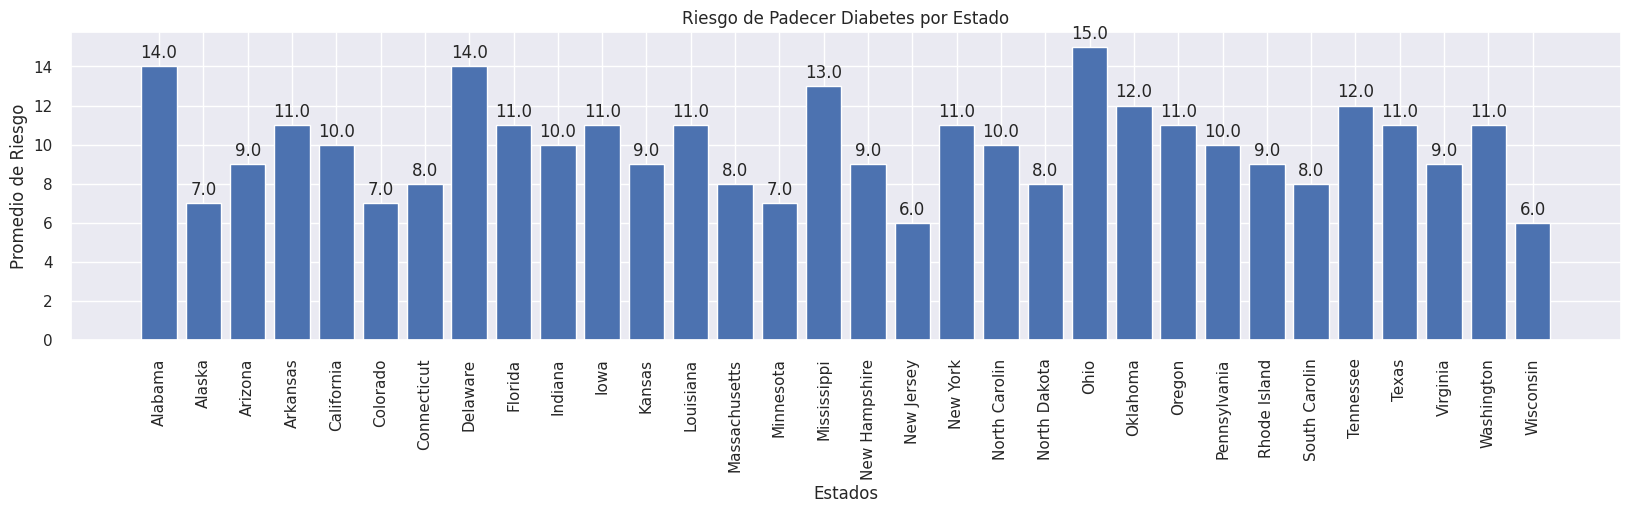

In [123]:
grafico = plt.bar(promedio_estados.index, promedio_estados["Valores"])
plt.title("Riesgo de Padecer Diabetes por Estado")
plt.xlabel("Estados")
plt.ylabel("Promedio de Riesgo")
plt.xticks(rotation=90)

for q in grafico:
   height = q.get_height()
   plt.annotate('{}'.format(height),
      xy=(q.get_x() + q.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha="center", va="bottom")

plt.show()

###### A partir de la información que ofrece la API, se puede ver que los Estados más afectados, o al menos con mayor riesgo de que sus individuos sufran de Diabetes son: Ohio, Alabama, Delaware y Mississippi. Por otro lado, los estados menos propensos a padecer dicha enfermedad son: Wisconsin y New Jersey. Como punto interesante, sería bueno evaluar qué condiciones diferencian a estos estados y los hacen más o menos propensos a la enfermedad, así como también evaluar por qué no hay ninguno con un índice menor a 6, se trata de condiciones culturales, del ambiente o simplemente predisposiciones genéticas?